<a href="https://colab.research.google.com/github/AbhinavNautiyal123/Health-Insurance-cross-Prediction/blob/main/HeathInsuranceCrossSellPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Health Insurance Cross Sell Prediction*


##### **Project Type**    - Classification
##### **Contribution**    - INDIVIDUAL


# **Problem Statement**


Our client, an insurance company, offers vehicle insurance to its customers. Now, they need your help to build a model that predicts if last year's policyholders would also be interested in buying vehicle insurance.

Insurance works by providing compensation for specific losses, damages, illnesses, or deaths in exchange for regular payments called premiums. For example, you might pay Rs. 2000 each year for health insurance that covers up to Rs. 100,000 in medical costs. The insurance company can afford to cover these costs because, out of many customers paying premiums, only a few will need to use the insurance each year. This spreads the risk among all policyholders.

Vehicle insurance works the same way. Customers pay an annual premium, and in case of an accident, the insurance company compensates them up to a certain amount.

Predicting which customers might want vehicle insurance helps the company target its communication and improve its business strategy and revenue.

To create this prediction model, you have data on demographics (like gender, age, and region), vehicles (age and condition), and policy details (premium and sourcing channel).

# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [2]:
#Basic libaries
import pandas as pd
import numpy as np

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,precision_score,recall_score,roc_auc_score


#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


### **Dataset Loading**

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/mydata/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
df_copy=df.copy()

### **Dataset First View**

In [5]:
# Dataset First Look
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### **Dataset Rows & Columns count**

In [6]:
# Dataset Rows & Columns count
print("number of rows ",df.shape[0],"and number of columns",df.shape[1])

number of rows  381109 and number of columns 12


### **Dataset Information**

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### **Duplicate Values**

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### **Missing Values/Null Values**

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### **What did you know about your dataset?**

This dataset contains 381109 number of rows and 12 columns out of which none of the rows are duplicated and no columns have any null values

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### **Variables Description**

- id: Unique identifier for each customer.

- Age: Age of the customer, ranging between 20 and 85 years.

- Driving_License: Binary variable indicating if the customer has a driving license (0: No, 1: Yes).

- Region_Code: Code representing the region of the customer.

- Previously_Insured: Binary variable indicating if the customer already has vehicle insurance (0: No, 1: Yes).

- Annual_Premium: The annual premium amount paid by the customer. Note: There are some outlier values as indicated by a sudden jump from the 75th percentile value to the maximum value.

- Policy_Sales_Channel: Code for the channel through which the policy was sold.

- Vintage: Number of days the customer has been with the company since they purchased insurance.

- Response: Binary target variable indicating if the customer is interested in vehicle insurance (0: No, 1: Yes).

### **Check Unique Values for each variable.**

In [13]:
#Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#AGe
df.Age.unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

In [15]:
#Driving_License
df.Driving_License.unique()

array([1, 0])

In [17]:
#Region_Code
df.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [18]:
#Previously_Insured
df.Previously_Insured.unique()

array([0, 1])

In [19]:
#Vehicle_Age
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [20]:
#Vehicle_Damage
df.Vehicle_Damage.unique()

array(['Yes', 'No'], dtype=object)

In [21]:
#Annual_Premium
df.Annual_Premium.unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

In [22]:
#Policy_Sales_Channel
df.Policy_Sales_Channel.unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [23]:
#Vintage
df.Vintage.unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

In [24]:
#Response
df.Response.unique()

array([1, 0])

## 3. ***Data Wrangling***

In [25]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

**Annual Prenium**

In [28]:
df.describe()['Annual_Premium']

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

**From the above observation i can see there are some outliers present in Annual_Premium column.**

<Axes: xlabel='Annual_Premium'>

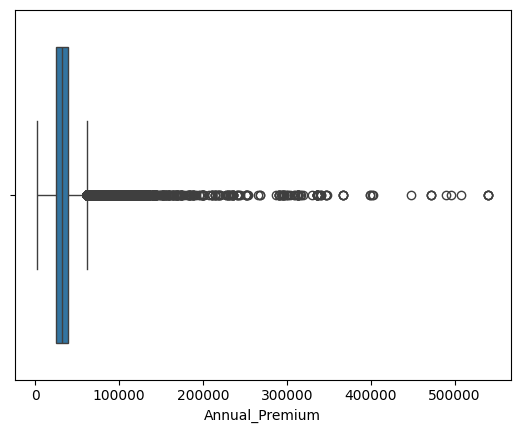

In [29]:
sns.boxplot(data=df,x='Annual_Premium')

**Handling outliers**

In [30]:
Q1=df.Annual_Premium.quantile(.25)
Q3=df.Annual_Premium.quantile(.75)
IQR=Q3-Q1
min_whisker=Q1-1.5*IQR
max_whisker=Q1+1.5*IQR

def fixed_outlier(row):
  if row>max_whisker:
    return Q3
  else:
    return row

df.insert(9,"Annual_Premium_Fixed",np.nan)
df['Annual_Premium_Fixed']=df['Annual_Premium'].apply(fixed_outlier)

**Checking**

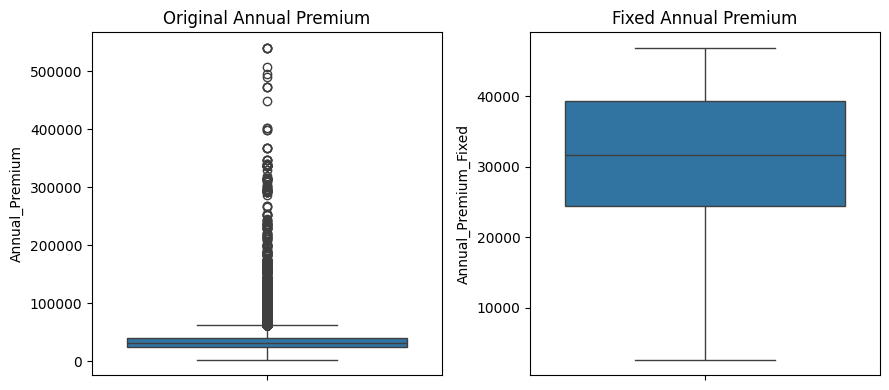

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot the original Annual Premium
sns.boxplot(ax=ax[0], data=df, y='Annual_Premium')
ax[0].set_title('Original Annual Premium')

# Plot the fixed Annual Premium
sns.boxplot(ax=ax[1], data=df, y='Annual_Premium_Fixed')
ax[1].set_title('Fixed Annual Premium')

plt.tight_layout()
plt.show()

**Age**

<Axes: xlabel='Age', ylabel='Count'>

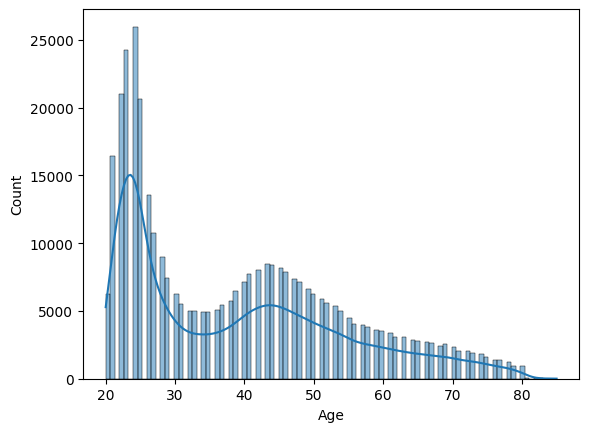

In [32]:
sns.histplot(data=df,x='Age',kde=True)

There is a significant dispersion in the Age column, which makes it difficult to gain meaningful insights. To address this, we can convert the Age values into categorical ranges such as 20-40, 40-60, and 60+.

In [33]:
df.insert(1,'Age_group',np.nan)

In [34]:
df['Age_group']=df['Age'].apply(lambda x : '20-40' if x>=20 and x<40 else ('40-60' if x>=40 and x<60 else '60+'))

**Checking**

<Axes: xlabel='Age_group'>

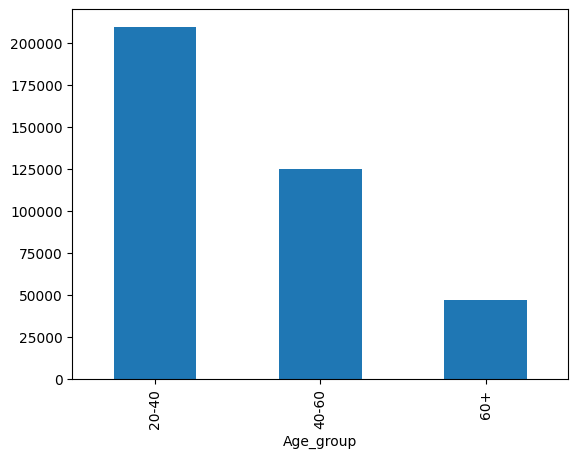

In [35]:
df.Age_group.value_counts().plot(kind='bar')

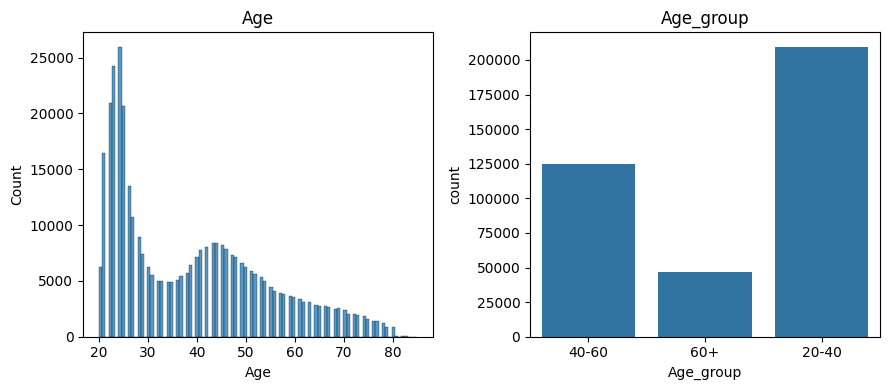

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot the Age
sns.histplot(ax=ax[0], data=df, x='Age')
ax[0].set_title('Age')

# Plot the Age_group
sns.countplot(ax=ax[1], data=df, x='Age_group')
ax[1].set_title('Age_group')

plt.tight_layout()
plt.show()

### **What all manipulations have you done and insights you found?**

Since this dataset has no null values and no duplicate rows, there is no need to handle null values or duplicate values. Additionally, the data types of all features are as required.

The only adjustment made was handling outliers in the Annual_Premium column. This column contains many outliers or annual premium values that are unrealistic in real-world scenarios. To address this, I handled all those high premium values by setting them equal to the upper whisker value.

There is a significant dispersion in the Age column, which makes it difficult to gain meaningful insights. To address this, we can convert the Age values into categorical ranges such as 20-40, 40-60, and 60+.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1  Distribution of Vintage , Annual_Premium_Fixed, Age**




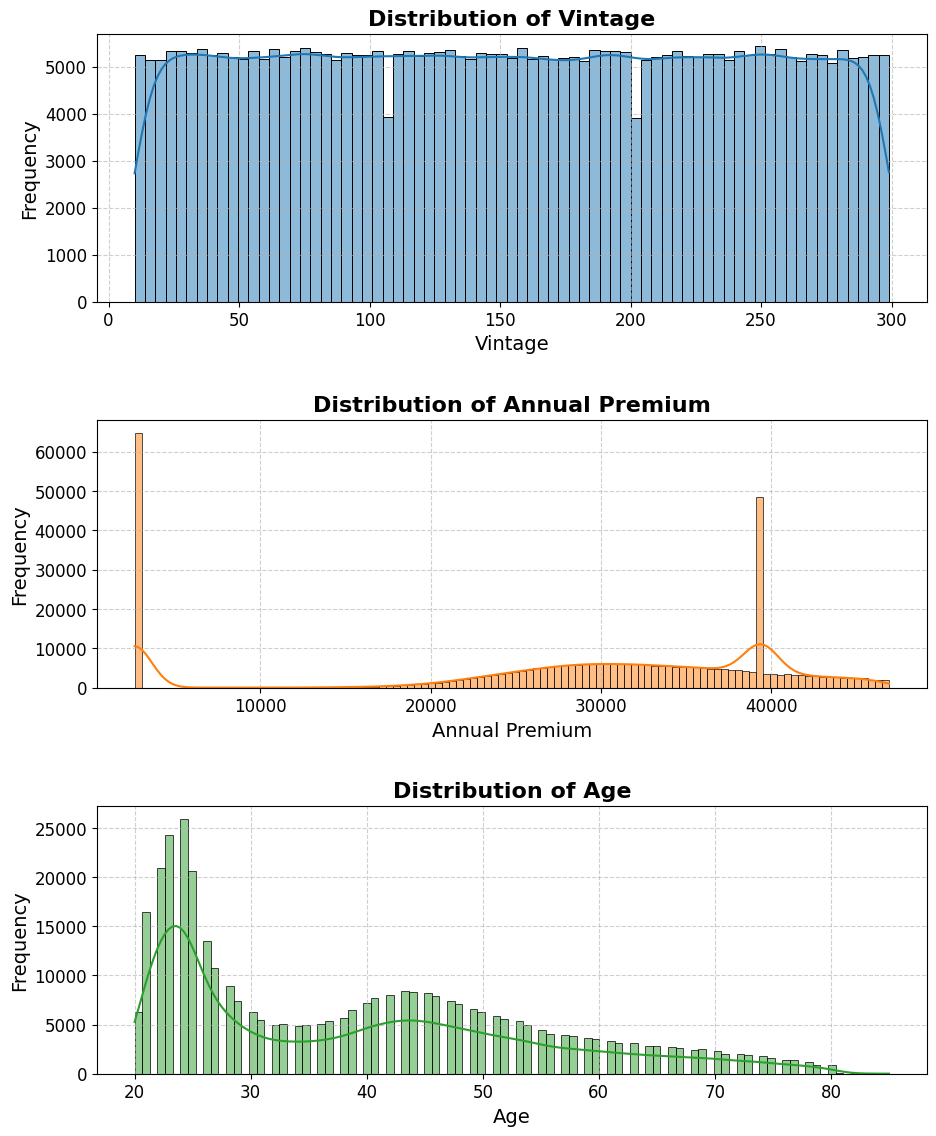

In [37]:

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Color palette
palette = sns.color_palette()

#Distribution of Vintage
sns.histplot(ax=ax[0], x='Vintage', kde=True, data=df, color=palette[0])
ax[0].set_title('Distribution of Vintage', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Vintage', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

#Distribution of Annual Prenium
sns.histplot(ax=ax[1], x='Annual_Premium_Fixed',kde=True, data=df, color=palette[1])
ax[1].set_title('Distribution of Annual Premium', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Annual Premium', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

#Distribution of Age
sns.histplot(ax=ax[2], x='Age', kde=True, data=df, color=palette[2])
ax[2].set_title('Distribution of Age', fontsize=16, fontweight='bold')
ax[2].set_xlabel('Age', fontsize=14)
ax[2].set_ylabel('Frequency', fontsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].grid(True, linestyle='--', alpha=0.6)

# Tight layout with additional space for titles
plt.tight_layout(pad=3.0)
plt.show()


##### **1. Why did you pick the specific chart?**

Histograms are best for showing the distribution of values in numerical columns. They make it easy to see the shape of the distribution, such as whether it is normal, skewed, bimodal, etc.

##### **2. What is/are the insight(s) found from the chart?**




**Distribution of Vintage**:
The distribution appears to be fairly uniform, indicating that the Vintage feature is uniformly distributed across its range. Each bin has a similar frequency, suggesting that each value of Vintage occurs with approximately the same frequency within the dataset.

**Distribution of Annual Premium**:
The annual premium feature shows a highly skewed distribution with two distinct peaks.
The first peak is around the lower end of the premium range, indicating that most policyholders pay a lower premium.
The second peak is around the higher end of the premium range, suggesting a smaller but significant group of policyholders pay a much higher premium.

**Distribution of Age**:

The distribution of Age is multimodal, with several peaks. It starts with a high frequency at younger ages, decreases, then has a few smaller peaks around middle age, and finally tails off towards older ages. This suggests that the dataset contains more younger individuals, with fewer older individuals, and some variations in between.

#### **Chart - 2 Distribution of categorical columns**

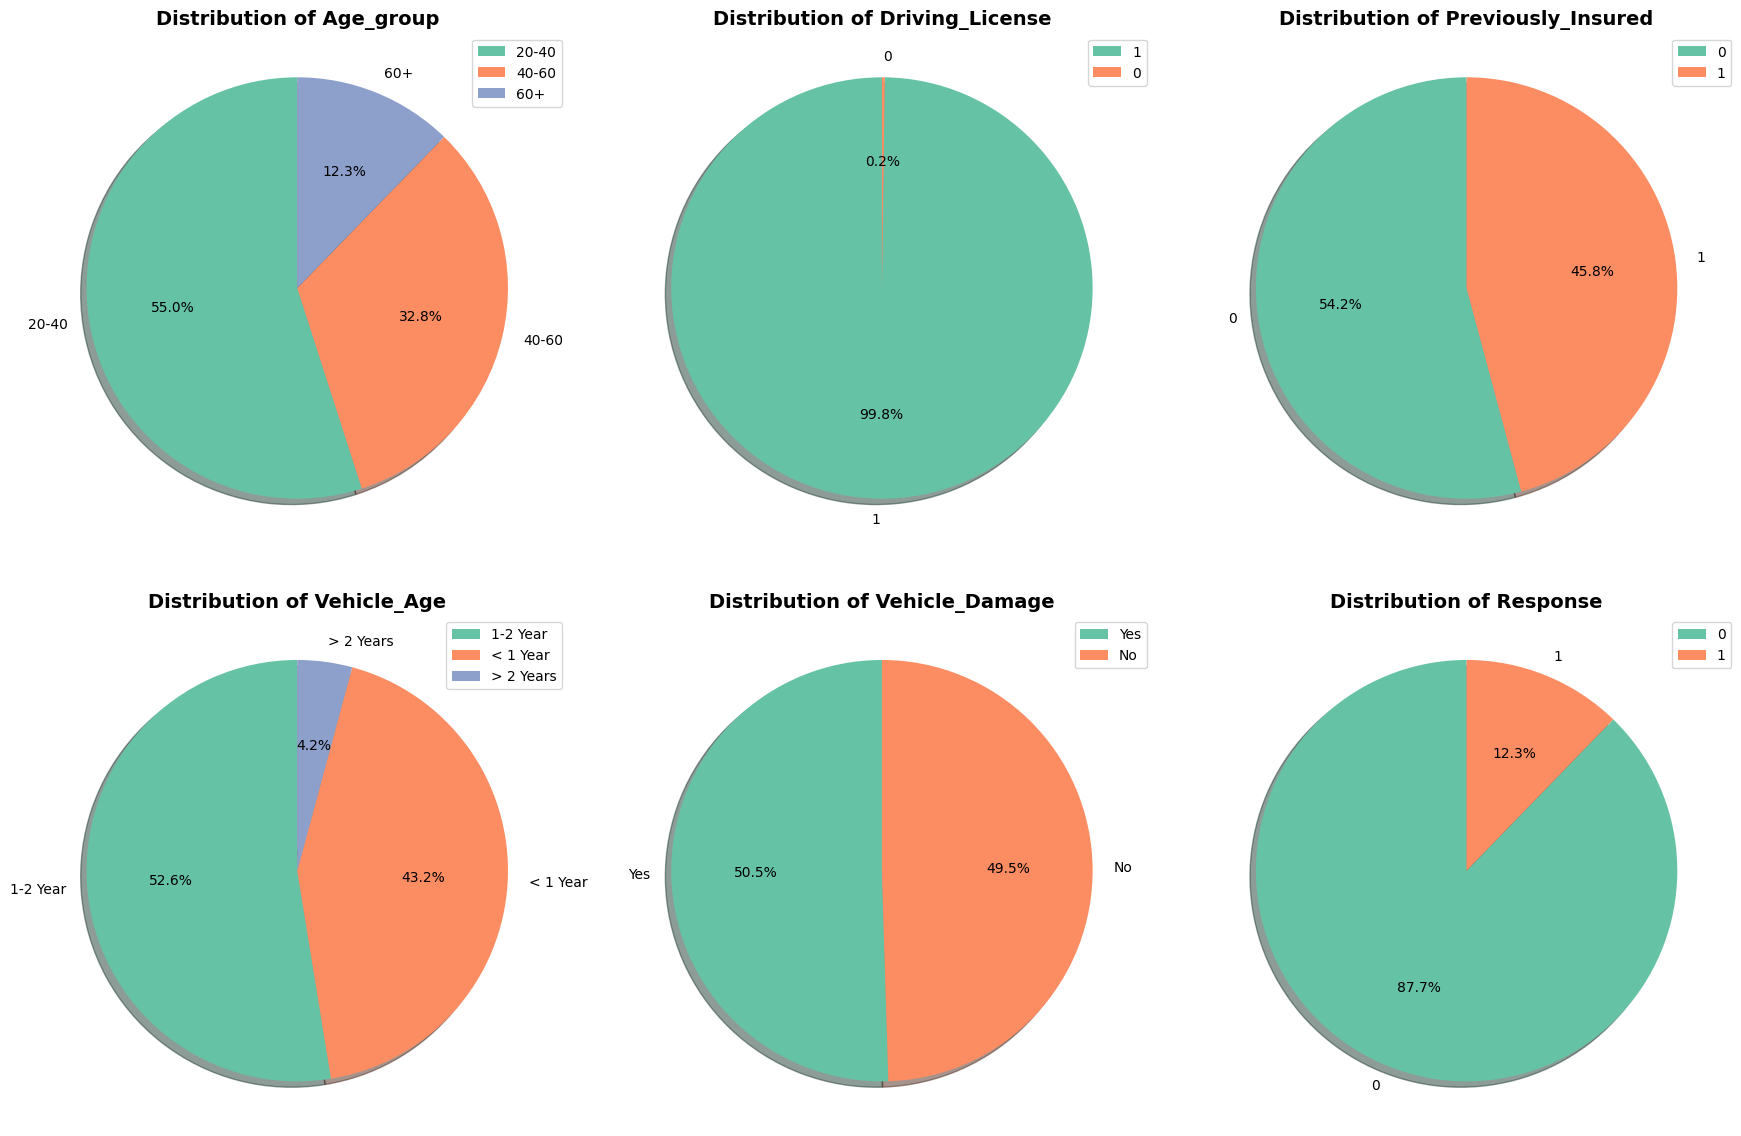

In [38]:

#columns to plot
cols = ['Age_group', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
ax = ax.flatten()


palette = sns.color_palette('Set2')

def plot_pie(col, ax):
    data = df[col].value_counts()
    labels = data.index
    sizes = data.values

    ax.pie(sizes, labels=labels, colors=palette, autopct='%1.1f%%', startangle=90, shadow=True)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.axis('equal')
    ax.legend(labels, loc='upper right', fontsize=10, bbox_to_anchor=(1.1, 1))

# Plot each column
for col, axes in zip(cols, ax):
    plot_pie(col, axes)

plt.tight_layout(pad=3.0)
plt.show()


##### **1. Why did you pick the specific chart?**

Other than bar plots or count plots, pie charts are the best way to represent how the values in a categorical column are distributed.

##### 2. What is/are the insight(s) found from the chart?

- Most policyholders are aged between 20 and 40, with the fewest being 60+
- 99.8% of policyholders have a driving license.
- Most customers have vehicles that are 1-2 years old or less than 1 year old.
- Half of the policyholders have vehicle damages, while the other half do not.

##### 3. Will the gained insights help creating a positive business impact?
The data shows that most policyholders are younger adults aged 20-40, while those over 60 are fewer, almost all policyholders, 99.8%, have a driver's license. Many customers own newer vehicles, typically 1-2 years old or less, suggesting they prefer newer models for reliability. Interestingly, about half of the policyholders have reported vehicle damages, showing a balanced risk across the group. These insights help insurance companies better understand their customers' age preferences, vehicle choices, and risk profiles, allowing them to offer more tailored and effective insurance options.

#### **Chart - 3 Relation of age_group with Annual prenium , Response and Gender**



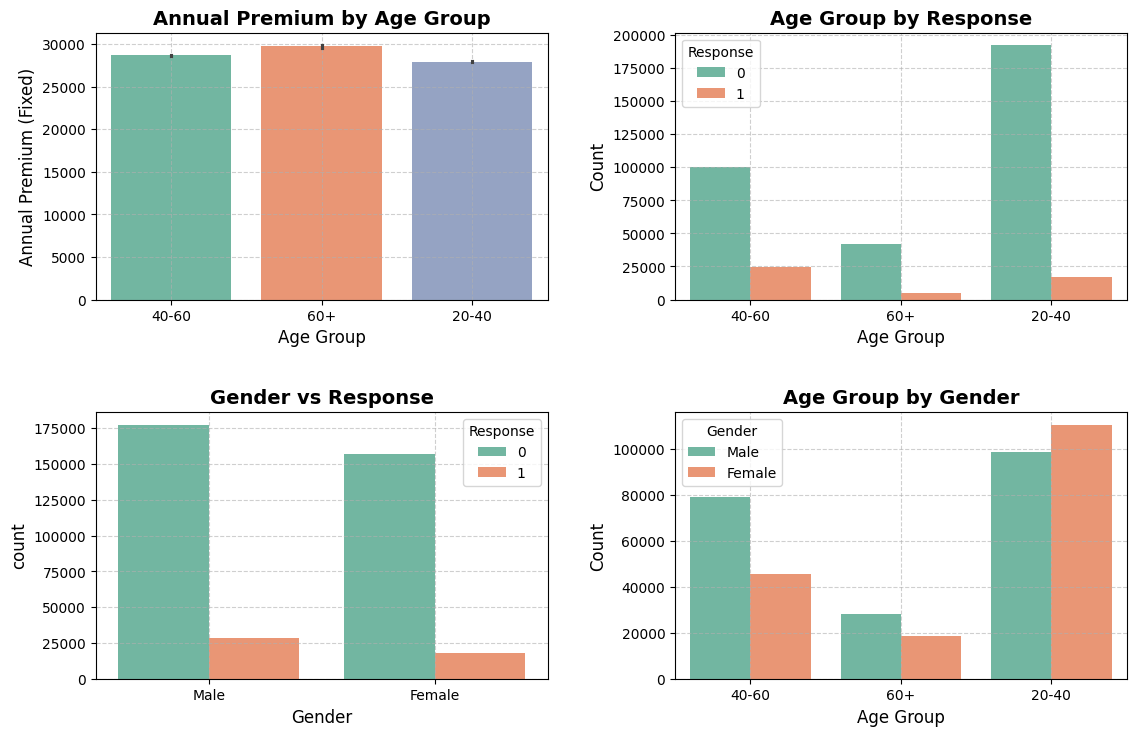

In [39]:

# Create a figure with a grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Define a color palette
palette = sns.color_palette("Set2")

# Bar plot for Annual Premium by Age Group
sns.barplot(ax=ax[0, 0], x='Age_group', y='Annual_Premium_Fixed', data=df, palette=palette)
ax[0, 0].set_title('Annual Premium by Age Group', fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel('Age Group', fontsize=12)
ax[0, 0].set_ylabel('Annual Premium (Fixed)', fontsize=12)
ax[0, 0].tick_params(axis='both', which='major', labelsize=10)
ax[0, 0].grid(True, linestyle='--', alpha=0.6)

# Count plot for Age Group by Response
sns.countplot(ax=ax[0, 1], x='Age_group', hue='Response', data=df, palette=palette)
ax[0, 1].set_title('Age Group by Response', fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel('Age Group', fontsize=12)
ax[0, 1].set_ylabel('Count', fontsize=12)
ax[0, 1].tick_params(axis='both', which='major', labelsize=10)
ax[0, 1].legend(loc='upper left', title='Response', fontsize=10)
ax[0, 1].grid(True, linestyle='--', alpha=0.6)

# Bar plot for Gender by Response
sns.countplot(ax=ax[1, 0], x='Gender', hue='Response', data=df, palette=palette)
ax[1, 0].set_title('Gender vs Response', fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel('Gender', fontsize=12)
ax[1, 0].set_ylabel('count', fontsize=12)
ax[1, 0].tick_params(axis='both', which='major', labelsize=10)
ax[1, 0].grid(True, linestyle='--', alpha=0.6)

# Count plot for Age Group by Gender
sns.countplot(ax=ax[1, 1], x='Age_group', hue='Gender', data=df, palette=palette)
ax[1, 1].set_title('Age Group by Gender', fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel('Age Group', fontsize=12)
ax[1, 1].set_ylabel('Count', fontsize=12)
ax[1, 1].tick_params(axis='both', which='major', labelsize=10)
ax[1, 1].legend(loc='upper left', title='Gender', fontsize=10)
ax[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()


##### 1. Why did you pick the specific chart?

- Bar Plot: Best for showing the relationship between a categorical variable and a numerical variable, such as averages or totals across categories.
- Count Plot: Best for visualizing the distribution or relationship between two categorical variables, where each bar represents the count of observations in each category.

##### **2. What is/are the insight(s) found from the chart?**

- 60+ age group customers give more anuual prenium in comparison of rest age groups
- 20-40 and 40-60 age group of policyholders are more interested to take vehicle insurance

- Male policyholder are more than female one
- There are more female than male in 20-40 age group,and for rest of the age groups female are lesser in number than man

#### **Chart -4 What is the relationship between Vehicle Age and Annual Premium?**


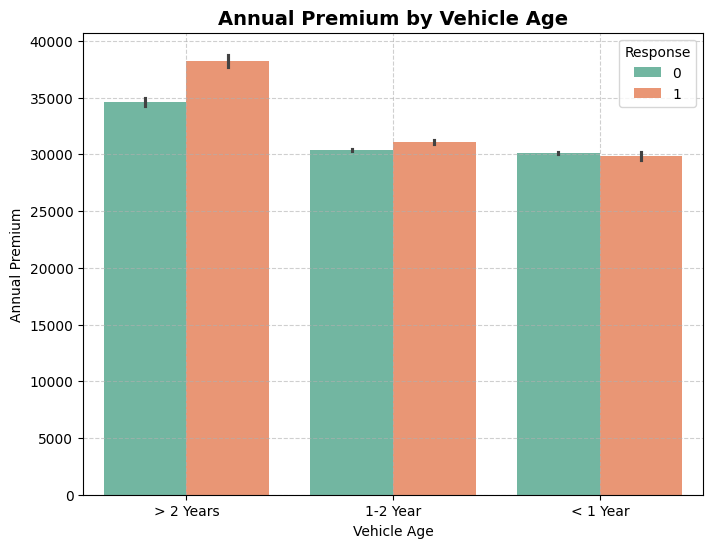

In [40]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2")
sns.barplot(x='Vehicle_Age', y='Annual_Premium',hue='Response' ,palette=palette,data=df)
plt.title('Annual Premium by Vehicle Age',fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


##### 1. Why did you pick the specific chart?


A bar plot is the most effective way to illustrate the relationship between a numerical column and a categorical column in a dataset

##### **2. What is/are the insight(s) found from the chart?**

The annual premium for a policyholder with a vehicle older than 2 years is higher compared to those with a vehicle less than 2 years old. Additionally, these customers have a higher likelihood of renewing their policies or purchasing additional coverage.

#### **Chart - 5 How does Age correlate with Vehicle Age?**

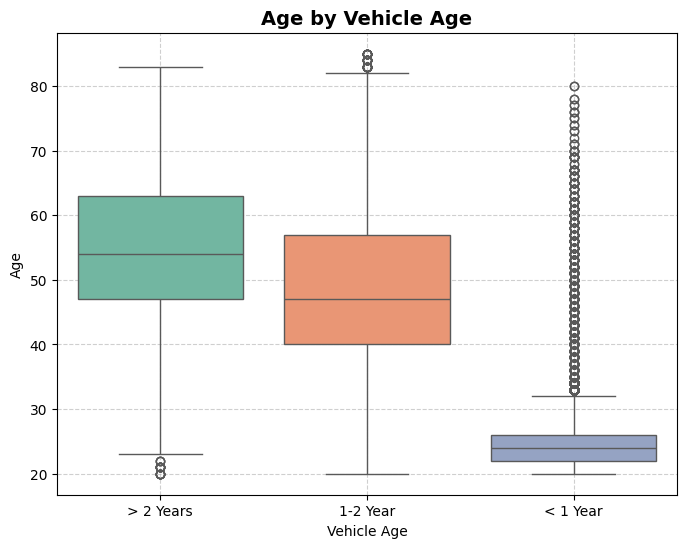

In [41]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Set2")

sns.boxplot(x='Vehicle_Age', y='Age', data=df,palette=palette)
plt.title('Age by Vehicle Age',fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Age')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### 1. Why did you pick the specific chart?

Boxplot can also  used to show relationship  between categorical and numerical

##### **2. What is/are the insight(s) found from the chart?**

1. Policyholders with vehicles less than 1 year old have a median age of 25.

2. Policyholders around 50 years old generally have vehicles between 1 and 2 years old.

3. Individuals aged 55 years or more tend to own vehicles older than 2 years.

#### **Chart - 6  how vehicle age affects the response rate (interest in Health insurance)**

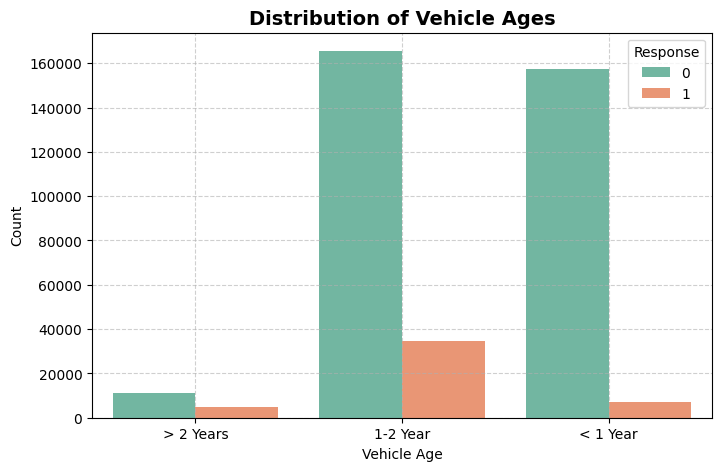

In [42]:
# Vehicle Age distribution
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")

sns.countplot(data=df, x='Vehicle_Age',hue='Response',palette=palette)
plt.title('Distribution of Vehicle Ages',fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


##### **1. What is/are the insight(s) found from the chart?**

Those policyholders with vehicles older than 2 years show a higher interest in taking or renewing their insurance, followed by those with vehicles aged between 1 and 2 years.

#### **Chart - 7 How does the policy sales channel affect the number of policies sold?**

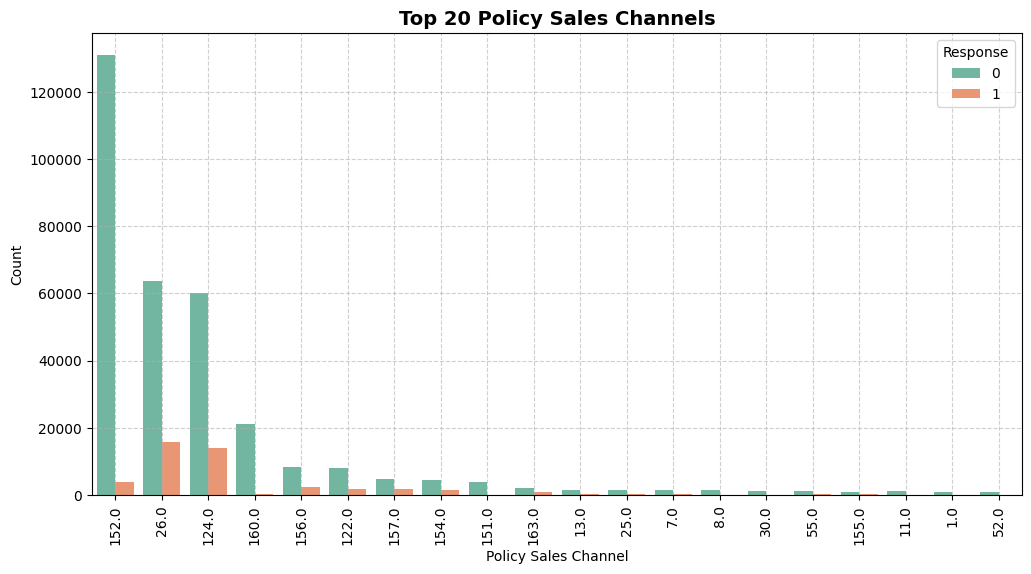

In [43]:
plt.figure(figsize=(12, 6))
palette=sns.color_palette('Set2')
sns.countplot(data=df, x='Policy_Sales_Channel',hue='Response', palette=palette, order=df['Policy_Sales_Channel'].value_counts().index[:20])
plt.title('Top 20 Policy Sales Channels',fontsize=14, fontweight='bold')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

Policy Sales Channels like 152.0, 26.0, 124.0, and 160.0 are the most active channels, with a majority of active policyholders having taken policies through these channels.

#### **Chart - 8 Which regions contribute the most to the customer base?**

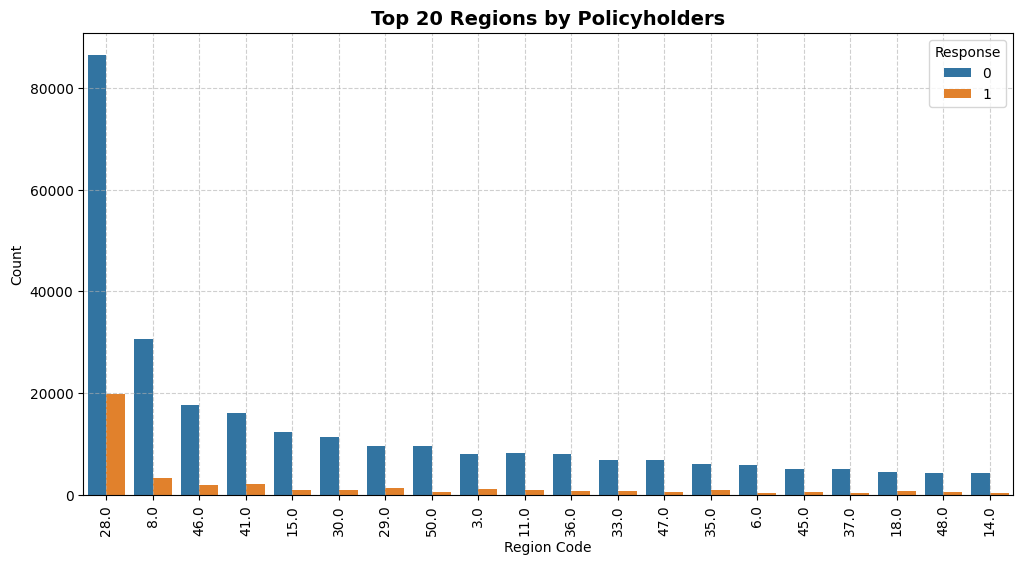

In [44]:
# Region Code distribution
plt.figure(figsize=(12, 6))
palette=sns.color_palette()
sns.countplot(data=df, x='Region_Code',hue='Response', palette=palette, order=df['Region_Code'].value_counts().index[:20])
plt.title('Top 20 Regions by Policyholders',fontsize=14, fontweight='bold')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


##### **1. What is/are the insight(s) found from the chart?**

Most policyholders come from region 28.0, followed by regions 8.0, 46.0, and 41.0

#### **Chart - 9 Is there a correlation between Age and Vintage and Age and Region?**

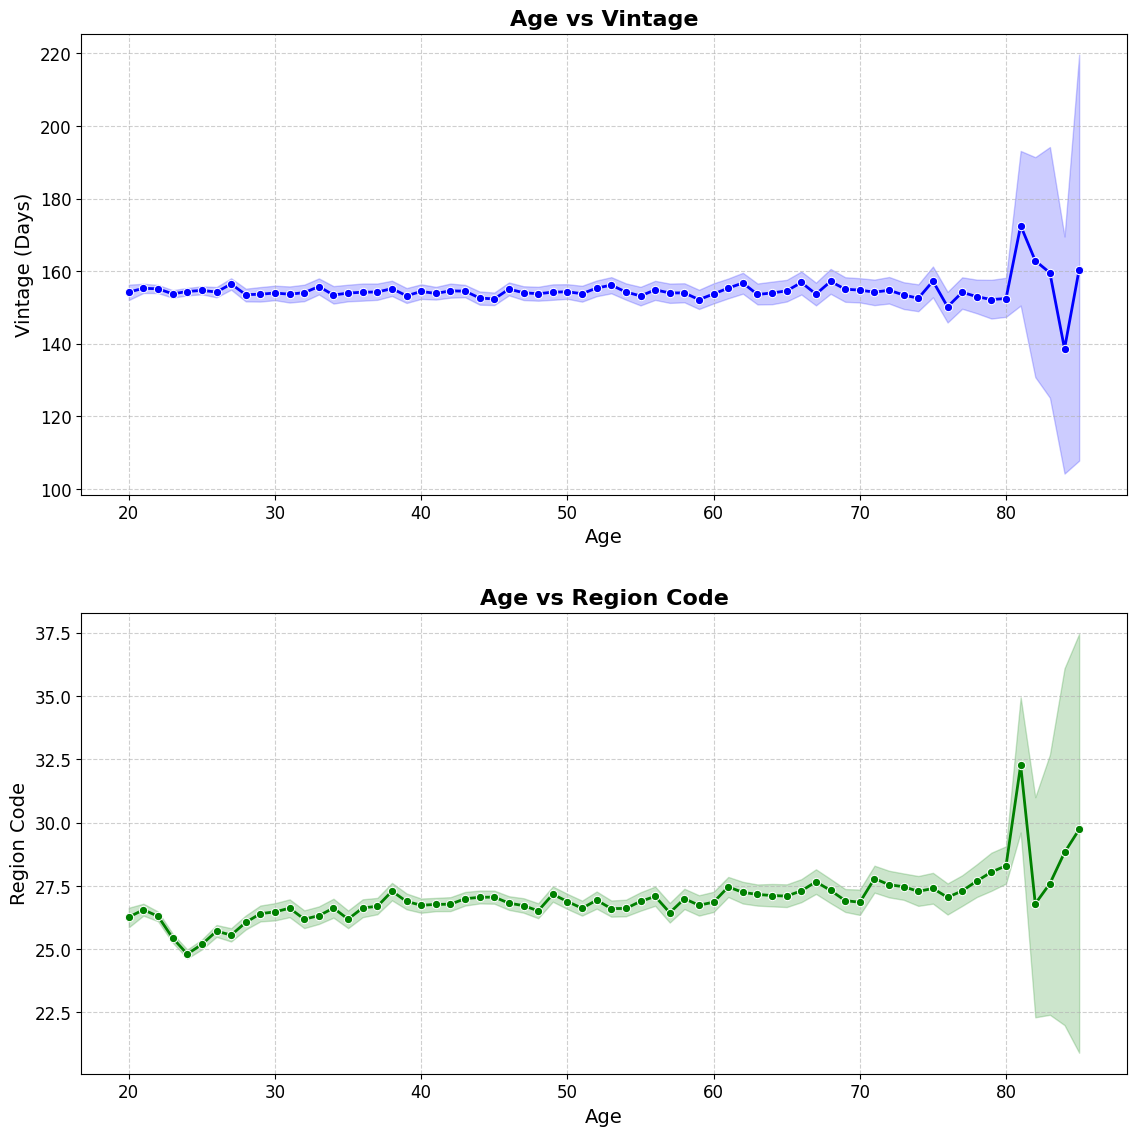

In [45]:

# Create the subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Age vs Vintage
sns.lineplot(ax=ax[0], x='Age', y='Vintage', data=df, marker='o', color='b', linewidth=2)
ax[0].set_title('Age vs Vintage', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Age', fontsize=14)
ax[0].set_ylabel('Vintage (Days)', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Age vs Region_Code
sns.lineplot(ax=ax[1], x='Age', y='Region_Code', data=df, marker='o', color='g', linewidth=2)
ax[1].set_title('Age vs Region Code', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Age', fontsize=14)
ax[1].set_ylabel('Region Code', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout(pad=3.0)
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

Line chart is best to check whether two numrical columns are correlated with each other or not

#### **Chart - 10 how many previously insured people will be insured again? and Is there any relation between Vehicle Damage and Response?**

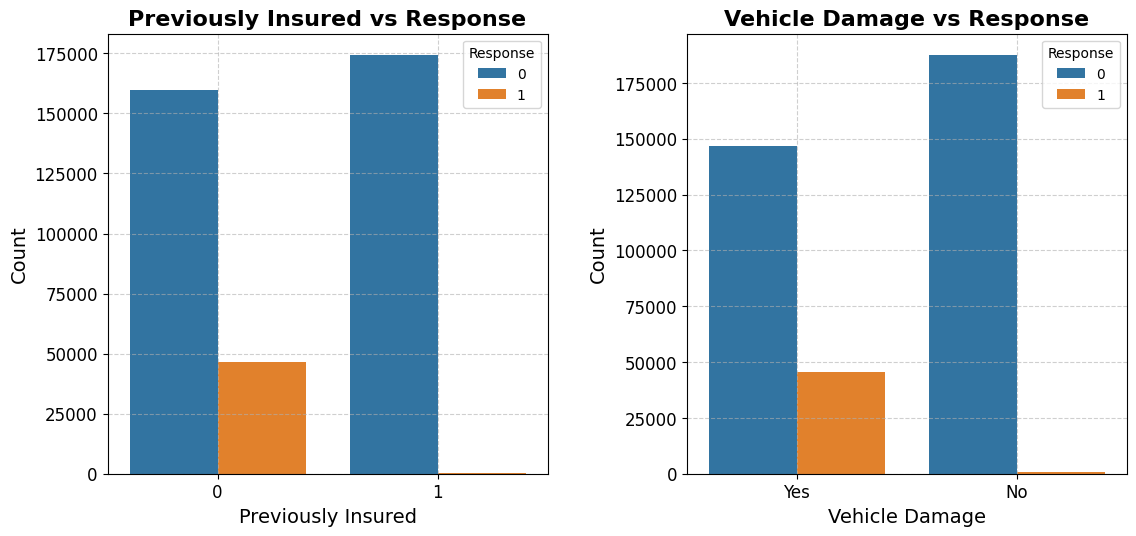

In [46]:

# Create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
palette = sns.color_palette()

# Previously_Insured vs Response
sns.countplot(ax=ax[0], x='Previously_Insured', hue='Response', data=df, palette=palette)
ax[0].set_title('Previously Insured vs Response', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Previously Insured', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Vehicle_Damage vs Response
sns.countplot(ax=ax[1], x='Vehicle_Damage', hue='Response', data=df, palette=palette)
ax[1].set_title('Vehicle Damage vs Response', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Vehicle Damage', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

- if a policy holder insured previously then there is very lower chances that he/she will insured again

- Those policyholder having vehical damage are more likely to renewed their insurance policy

#### **Chart - 11 proportion of individuals within each age group who were previously insured and then insured again**

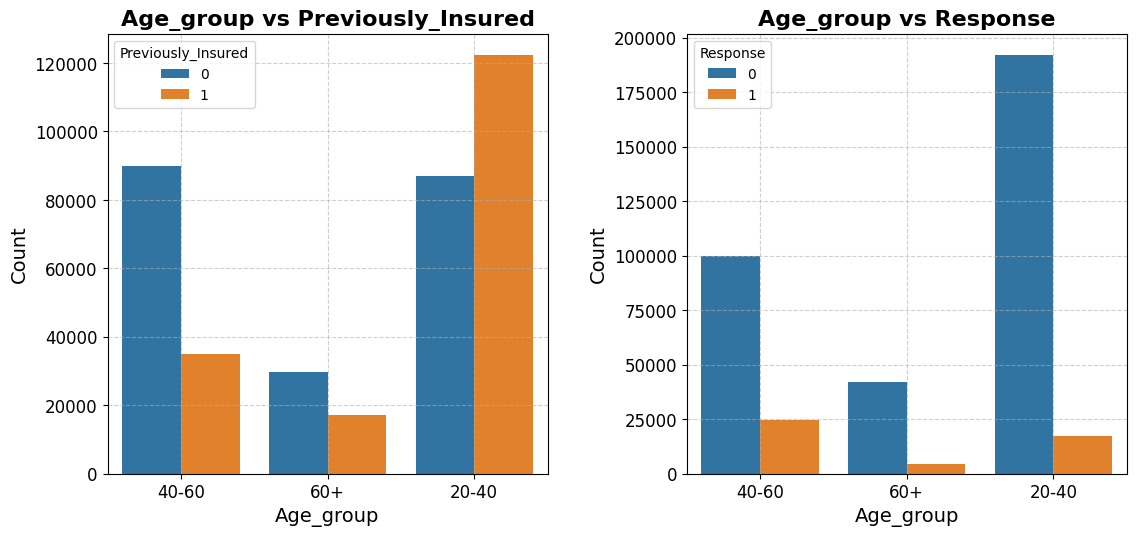

In [47]:

# Create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
palette = sns.color_palette()

# Previously_Insured vs Response
sns.countplot(ax=ax[0], x='Age_group', hue='Previously_Insured', data=df, palette=palette)
ax[0].set_title('Age_group vs Previously_Insured', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Age_group', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

# Vehicle_Damage vs Response
sns.countplot(ax=ax[1], x='Age_group', hue='Response', data=df, palette=palette)
ax[1].set_title('Age_group vs Response', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Age_group', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


##### **1. What is/are the insight(s) found from the chart?**

**Age Group 20-40:**

High Insurance Rate: Most have insurance.
Low Response Rate: Less interested in new offers, likely due to already having coverage.

**Age Group 40-60:**

Balanced Insurance Status: Evenly split between insured and uninsured.
Moderate Response Rate: Mixed interest in offers, influenced by varying needs and commitments.

**Age Group 60+:**

Low Insurance Rate: Few have insurance.
Low Response Rate: Least engaged, possibly due to existing coverage or lack of interest.

#### **Chart - 12 is there any relation between vintage and Response ?**

In [48]:
#for this first i made categories out of vintage columns
df.insert(12,'Vintage_category',np.nan)

In [49]:
#
df['Vintage_category']=df['Vintage'].apply(lambda x:"short period"if x>=0 and x<100 else ("mid period" if x>=100 and x<200 else "Long period"))

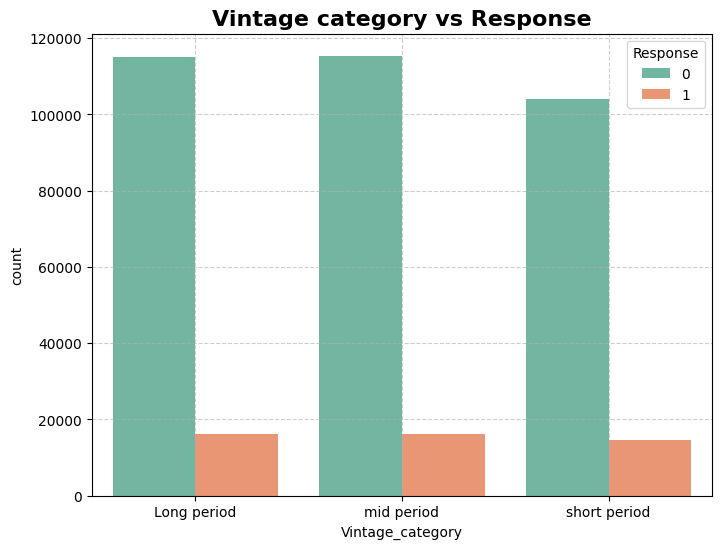

In [50]:
plt.figure(figsize=(8, 6))

palette = sns.color_palette('Set2')

sns.countplot(data=df,x='Vintage_category',hue='Response',palette=palette)
plt.title('Vintage category vs Response', fontsize=16, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)


## ***5. Feature Engineering & Data Pre-processing***

### **1. Categorical Encoding**

There are several categorical columns in this dataset such as Gender, Vehicle Age, Vintage Category, and Previously Insured.
Encoding involves assigning a numeric value to each category within a feature, facilitating model learning. If a column has more than 3 categories, consider splitting it into multiple columns to enhance the model's ability to discern patterns in the data.

In [51]:
#Encoding Gender_categories
df.insert(2,'Gender_Male',df['Gender'].apply(lambda x: 1 if x=='Male' else 0))
df.insert(3,'Gender_Female',df['Gender'].apply(lambda x: 1 if x=='Female' else 0))

In [52]:
#encoding Vehicle_age
df.insert(9,'Vehicle_age_>2_years',df['Vehicle_Age'].apply(lambda x : 1 if x=='> 2 Years' else 0))
df.insert(9,'Vehicle_age_1-2_years',df['Vehicle_Age'].apply(lambda x : 1 if x=='1-2 Year' else 0))
df.insert(10,'Vehicle_age_<1_years',df['Vehicle_Age'].apply(lambda x : 1 if x=='< 1 Year' else 0))

In [53]:
#encoding Age_group
df.insert(1,'AgeBetween20And40',df['Age_group'].apply(lambda x: 1 if x=='20-40' else 0))
df.insert(1,'AgeBetween40And60',df['Age_group'].apply(lambda x: 1 if x=='40-60' else 0))
df.insert(1,'Age60+',df['Age_group'].apply(lambda x: 1 if x=='60+' else 0))

In [54]:
#encoding Previously_Insured
df.insert(19,'Previously_Insured_yes',df['Previously_Insured'].apply(lambda x: 1 if x==1 else 0))
df.insert(20,'Previously_Insured_no',df['Previously_Insured'].apply(lambda x: 1 if x==0 else 0))

In [55]:
#encoding Vintage_category
df.insert(22,'Long_term_customer',df['Vintage_category'].apply(lambda x: 1 if x=='Long period' else 0))
df.insert(23,'mid_term_customer',df['Vintage_category'].apply(lambda x: 1 if x=='mid period' else 0))
df.insert(24,'short_term_customer',df['Vintage_category'].apply(lambda x: 1 if x=='short period' else 0))

In [56]:
#labelEncoding Categorical column
label=LabelEncoder()
for col in df.columns:
  if df[col].dtype in ['object']:
    df[col]=label.fit_transform(df[[col]])

In [57]:
df.head()

,id,Age60+,AgeBetween40And60,AgeBetween20And40,Age_group,Gender_Male,Gender_Female,Gender,Age,Driving_License,...,Annual_Premium_Fixed,Previously_Insured_yes,Previously_Insured_no,Policy_Sales_Channel,Long_term_customer,mid_term_customer,short_term_customer,Vintage_category,Vintage,Response
0,1,0,1,0,1,1,0,1,44,1,...,40454.0,0,1,26.0,1,0,0,0,217,1
1,2,1,0,0,2,1,0,1,76,1,...,33536.0,0,1,26.0,0,1,0,1,183,0
2,3,0,1,0,1,1,0,1,47,1,...,38294.0,0,1,26.0,0,0,1,2,27,1
3,4,0,0,1,0,1,0,1,21,1,...,28619.0,1,0,152.0,1,0,0,0,203,0
4,5,0,0,1,0,0,1,0,29,1,...,27496.0,1,0,152.0,0,0,1,2,39,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I manualy did categorical encoding, without using One hot encoding

### **2. Droping unwanted columns**

before i proceed i am going to drop all unused columns

In [58]:
col_to_drop=['id','Age_group','Gender','Age','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage_category','Vintage']
df.drop(columns=col_to_drop,axis=1,inplace=True)

### 3. **Inbalanced dataset**

**What is inbalanced datset**

If for a classification dataset, if the classes in my target feature are not in same proportion than we can say that the dataset is inbalanced.

<Axes: xlabel='Response'>

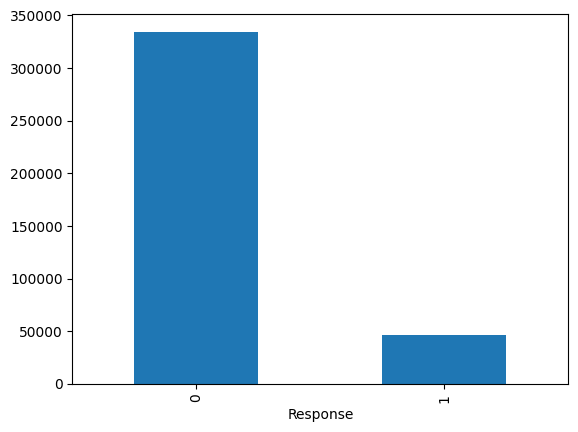

In [59]:
df.Response.value_counts().plot(kind='bar')

The categories in this target feature are not proportionately represented, which can cause our model to make incorrect predictions and become biased towards the majority class.

###**Handling inbalanced dataset**

In [60]:
#SMOTE (Synthetic Minority Over-sampling Technique)
x=df.drop(columns='Response')
y=df['Response']

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
Xs,Ys=smote.fit_resample(x,y)


In [61]:
balanced_df = pd.concat([pd.DataFrame(Xs, columns=x.columns), pd.DataFrame(Ys, columns=['Response'])], axis=1)

**Checking**

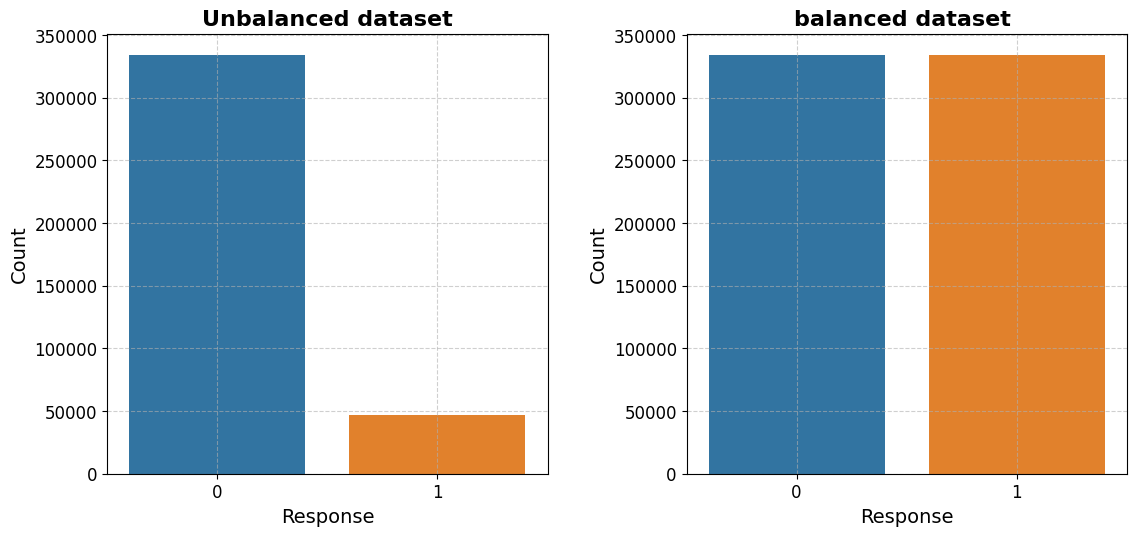

In [62]:

# Create the subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
palette = sns.color_palette()

# Previously_Insured vs Response
sns.countplot(ax=ax[0], x='Response', data=df, palette=palette)
ax[0].set_title('Unbalanced dataset', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Response', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

#After apply SMOTE
sns.countplot(ax=ax[1], x='Response', data=balanced_df, palette=palette)
ax[1].set_title('balanced dataset ', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Response', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


To Handle this inbalanced dataset i use a Famous Technique called SMOTE stands for synthetic minority oversampling technique, this technique only focuses on minority class , it tried to create new minority sample from the nearest samples using Knn technique.

###**Data Scaling**

To ensure that all features contribute equally to the model training process, I have utilized techniques to standardize or normalize my dataset. One such technique is Min-Max Scaling, which scales the numerical features to a range between 0 and 1.

In [63]:
#before data scaling
balanced_df[['Region_Code','Policy_Sales_Channel','Annual_Premium_Fixed']].head()

,Region_Code,Policy_Sales_Channel,Annual_Premium_Fixed
0,28.0,26.0,40454.0
1,3.0,26.0,33536.0
2,28.0,26.0,38294.0
3,11.0,152.0,28619.0
4,41.0,152.0,27496.0


In [64]:
scaler = MinMaxScaler()
for col in ['Region_Code','Policy_Sales_Channel','Annual_Premium_Fixed']:
    balanced_df[col]=scaler.fit_transform(balanced_df[[col]])


In [65]:
#After data scaling
balanced_df[['Region_Code','Policy_Sales_Channel','Annual_Premium_Fixed']].head()

,Region_Code,Policy_Sales_Channel,Annual_Premium_Fixed
0,0.538462,0.154321,0.854451
1,0.057692,0.154321,0.698172
2,0.538462,0.154321,0.805657
3,0.211538,0.932099,0.587096
4,0.788462,0.932099,0.561728


### **4. Feature Manipulation & Selection**

#### **1. Feature Selection**

In [65]:
X=balanced_df.drop(columns='Response')
Y=balanced_df['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

<Axes: >

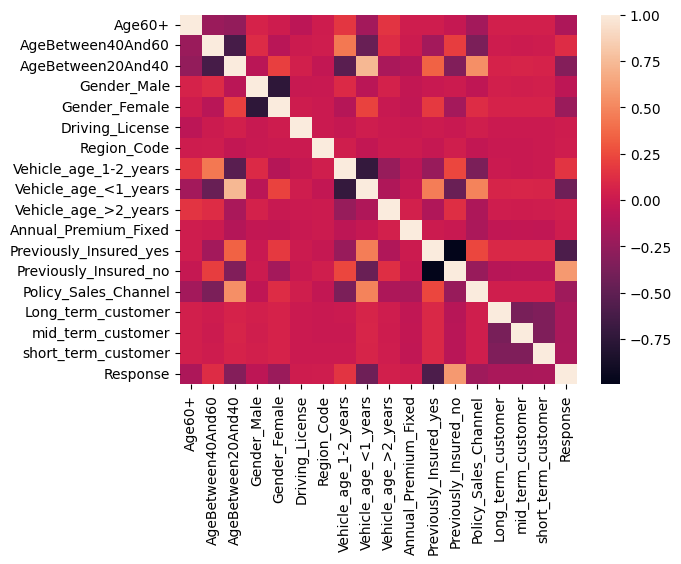

In [66]:
sns.heatmap(balanced_df.corr())

1. **feature Selection using Lasso Regression**

Lasso regression prevents overfitting by adding a penalty term, α, to the error function. In logistic regression, this function typically uses the logarithm of the likelihood.

One of the key benefits of Lasso regression is its capability for feature selection. By increasing the value of α, less important features have their corresponding coefficients shrink towards zero or become exactly zero. This regularization process promotes sparsity in the model, effectively excluding irrelevant features. As a result, the remaining non-zero coefficients indicate the most important features for predicting the target variable.

In [67]:
from sklearn.linear_model import Lasso
# Split the data into training and testing sets

# Define the range of alpha values for Lasso regression
alpha_values = [0, 0.01, 0.02, 0.03, 0.04, 0.05]

# Initialize a DataFrame to store the coefficients for each alpha value
coefficients = pd.DataFrame(index=X.columns)

# Loop over the range of alpha values
for alpha in alpha_values:
    # Initialize and fit the Lasso model with the current alpha value
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, Y_train)

    # Store the coefficients in the DataFrame
    coefficients[f'alpha:{alpha}'] =lasso.coef_

# Display the resulting DataFrame with coefficients
coefficients

,alpha:0,alpha:0.01,alpha:0.02,alpha:0.03,alpha:0.04,alpha:0.05
Age60+,-0.337944,-0.109771,-0.010526,-0.000000,-0.000000,-0.000000
AgeBetween40And60,-0.156496,-0.000000,-0.000000,-0.000000,0.000000,0.000000
AgeBetween20And40,-0.136232,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Gender_Male,-0.169900,-0.120185,-0.037592,-0.000000,-0.000000,-0.000000
Gender_Female,-0.193010,-0.147453,-0.067727,-0.009556,-0.000000,-0.000000
Driving_License,0.112604,0.000000,0.000000,0.000000,0.000000,0.000000
Region_Code,-0.007739,-0.000000,0.000000,0.000000,0.000000,0.000000
Vehicle_age_1-2_years,-0.128882,-0.014338,-0.000000,-0.000000,0.000000,0.000000
Vehicle_age_<1_years,-0.292142,-0.182064,-0.141041,-0.116488,-0.084787,-0.051376
Vehicle_age_>2_years,-0.070127,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [68]:
#not important features
not_imp_feature={'Driving_License','Region_Code','Policy_Sales_Channel'}

2. **SequentialFeatureSelector**

A Sequential Feature Selector (SFS) is a type of wrapper method used in feature selection. Wrapper methods evaluate the performance of a model based on different subsets of features, selecting the subset that yields the best performance.

In a wrapper method, the process involves creating subsets of the dataset and training a model on each subset. For classification problems, accuracy is typically used as the evaluation metric, while for regression problems, the R² score is used. The subset that results in the best model performance is then selected.

In Sequential Feature Selection (SFS), the process works as follows:

Initial Training: Start by training the model with all available features.

Iterative Removal: Iteratively remove one feature at a time, assessing the impact of each removal on the model's performance. The feature whose removal causes the least decrease in performance is considered the least important.

Evaluation: Continue this process until only a single feature remains.

Performance Comparison: At each iteration, compare the model's accuracy (or R² score) for the different subsets of features. The subset that provides the best performance across all iterations is selected.

In [ ]:
balanced_df

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector
SFS=SequentialFeatureSelector(
    estimator=DecisionTreeClassifier(),direction='forward',n_jobs=-1
)

In [70]:
SFS.fit(X_train, Y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), n_jobs=-1)

In [71]:
SFS.get_feature_names_out()

array(['Age60+', 'AgeBetween40And60', 'AgeBetween20And40', 'Region_Code',
       'Vehicle_age_1-2_years', 'Annual_Premium_Fixed',
       'Previously_Insured_yes', 'Policy_Sales_Channel'], dtype=object)

In [72]:
selected_features = SFS.get_support()

best_features= set(X.columns[selected_features])
print('The selected features are:', best_features)

The selected features are: {'Age60+', 'Vehicle_age_1-2_years', 'Policy_Sales_Channel', 'AgeBetween40And60', 'Region_Code', 'Previously_Insured_yes', 'AgeBetween20And40', 'Annual_Premium_Fixed'}


In [73]:
all_features=set(df.columns[::-1])
notimp_feature2 = all_features - best_features
print(notimp_feature2)

{'Gender_Female', 'Gender_Male', 'Long_term_customer', 'Vehicle_age_<1_years', 'Previously_Insured_no', 'Vehicle_age_>2_years', 'Driving_License', 'mid_term_customer', 'Response', 'short_term_customer'}


In [74]:
#Feature to drop
drop_tofeature=not_imp_feature.intersection(notimp_feature2)
print("Features which are not important ",drop_tofeature)

Features which are not important  {'Driving_License'}


**Droping non important features**

In [67]:
balanced_df.drop(columns=drop_tofeature,inplace=True)

In [68]:
balanced_df

,Age60+,AgeBetween40And60,AgeBetween20And40,Gender_Male,Gender_Female,Region_Code,Vehicle_age_1-2_years,Vehicle_age_<1_years,Vehicle_age_>2_years,Annual_Premium_Fixed,Previously_Insured_yes,Previously_Insured_no,Policy_Sales_Channel,Long_term_customer,mid_term_customer,short_term_customer,Response
0,0,1,0,1,0,0.538462,0,0,1,0.854451,0,1,0.154321,1,0,0,1
1,1,0,0,1,0,0.057692,1,0,0,0.698172,0,1,0.154321,0,1,0,0
2,0,1,0,1,0,0.538462,0,0,1,0.805657,0,1,0.154321,0,0,1,1
3,0,0,1,1,0,0.211538,0,1,0,0.587096,1,0,0.932099,1,0,0,0
4,0,0,1,0,1,0.788462,0,1,0,0.561728,1,0,0.932099,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668793,0,1,0,1,0,0.538462,1,0,0,0.623746,0,1,0.154321,0,0,0,1
668794,0,1,0,0,0,0.538462,0,0,0,0.468570,0,1,0.154321,0,0,0,1
668795,0,1,0,0,1,0.538462,1,0,0,0.709500,0,1,0.154321,0,0,0,1
668796,0,1,0,0,0,0.509538,1,0,0,0.609714,0,1,0.751832,1,0,0,1


###**8. Data Splitting**

In [69]:
#suffeling rows before splitting
balanced_df=balanced_df.sample(668798)

#splitting your data
X=balanced_df.drop(columns='Response')
Y=balanced_df['Response']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=42)

I have split my dataset into three parts: Training set, Validation set, and Testing set, with a splitting ratio of 70:20:10. Now, I am going to train my model using the Training set and then check its performance using the Validation set. After that, I will perform hyperparameter tuning using the Validation set to find the best parameters. Once I find the best parameters, I will retrain my model using the Training set with these optimal parameters and evaluate its performance using evaluation metrics. Finally, I will test how my model performs on the unseen Testing set, which will give me an unbiased assessment of its performance.

In [70]:
print("X_train ",X_train.shape)
print("Y_train ",X_train.shape)


print("X_test ",X_test.shape)
print("Y_test ",X_test.shape)

X_train  (481534, 16)
Y_train  (481534, 16)
X_test  (53504, 16)
Y_test  (53504, 16)


#####**What data splitting ratio have you used and why?**


The ideal data splitting ratio depends on the size of the dataset and the problem we are solving. If the training set is too small, the model may not be able to find patterns or relationships in the data, leading to underfitting. Therefore, the training set should be large enough to capture the underlying patterns. On the other hand, if the test set is too small, it may not represent the overall distribution of the data, making the accuracy after testing unreliable. Hence, the test set should also be large enough, but not so large that it makes the training set too small, which could again lead to underfitting.

Generally, an 80-20 split is used, meaning 80% of the data is used for training and 20% for testing. This ratio is commonly chosen because it tends to give the best results in most cases.

## ***6. ML Model Implementation***

#### **HyperParameter tuning**

**I have used two techniques for Hyperparamter Tuning**

1. HalvingRandomSearchCV
2. RandomizedSearchCV


In [70]:
#hyperparamter tuning techniques

import time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


def Hyperparameter_tuning(model,X_train,Y_train,param_grid,tuning_model):
  start=time.time()
  if tuning_model=='RandomizedSearchCV':
    n_iter=int(input("n_iter :"))
    cv=int(input("Cv :"))
    rf_grid=RandomizedSearchCV(
        estimator=model,param_distributions=param_grid,n_iter=n_iter,n_jobs=-1,cv=cv, verbose=1,scoring='accuracy', random_state=42
    )

    try:
      rf_grid.fit(X_train, Y_train)
      return f"""Best parameters by RandomizedSearchCV: {rf_grid.best_params_},
      Best cross-validation score: {rf_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """

    except Exception as e:
        return f"An error occurred: {e}"
  else:
    start=time.time()
    hr_grid=HalvingRandomSearchCV(
        estimator=model,param_distributions=param_grid,cv=3,n_jobs=-1,factor=3,verbose=1,scoring='accuracy'
    )
    try:
      hr_grid.fit(X_train, Y_train)
      return f"""
      Best parameters by HalvingRandomSearchCV: {hr_grid.best_params_},
      Best cross-validation score: {hr_grid.best_score_}
      execution time : {round(time.time()-start)} sec
      """
    except Exception as e:
        return f"An error occurred: {e}"


####**Evaluation Metrics**

When evaluating a classification model, several metrics can be used to assess its performance comprehensively. Below are key metrics and their significance:

1. **Accuracy Score**: This metric indicates the proportion of correct predictions made by the model out of the total number of predictions. While accuracy is straightforward and intuitive, it has a significant limitation: it does not provide information about the types of errors the model is making.

2. **Confusion Matrix**: The confusion matrix addresses the shortcomings of the accuracy score by detailing the types of errors. It provides a breakdown of the following:

3. **True Positive (TP)**: The model correctly predicts a positive class (e.g., predicting cancer when the patient actually has cancer).
False Positive (FP): The model incorrectly predicts a positive class (e.g., predicting cancer when the patient does not have cancer).
True Negative (TN): The model correctly predicts a negative class (e.g., predicting no cancer when the patient does not have cancer).
False Negative (FN): The model incorrectly predicts a negative class (e.g., predicting no cancer when the patient actually has cancer).
Ideally, the number of false positives and false negatives should be zero or close to zero.

4. **Precision (P)**: This metric measures the proportion of predicted positive cases that are actually positive:

       Precision=TP/(TP+FP)
Ideally, the precision value should be 1, indicating no false positives.

5. **Recall (R)**: Also known as sensitivity, recall measures the proportion of actual positive cases that are correctly classified:

Recall=TP/(TP+FN)
Ideally, the recall value should be 1, indicating no false negatives.

6. **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both:

F1_Score =2 Precision * Recall/(Precision+Recall)


7. **ROC AUC**: The Area Under the Receiver Operating Characteristic Curve (ROC AUC) is a comprehensive metric that evaluates the model's ability to distinguish between classes. An AUC of 1 indicates perfect discrimination:

In [71]:
def Evaluation_Metrics(model_object,X_test,Y_test):
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]

    mat = {
        'Accuracy Score': accuracy_score(Y_test, Y_pred),
        'Recall Score': recall_score(Y_test, Y_pred),
        'Precision Score': precision_score(Y_test, Y_pred),
        'F1 Score': f1_score(Y_test, Y_pred),
        'ROC AUC Score': roc_auc_score(Y_test, y_probs)
    }

    mat_df = pd.DataFrame.from_dict(mat, orient='index', columns=['Score'])

    return visualise(model_object, Y_test, X_test),mat_df

**Roc_curve and confusion matrix**

In [72]:
def visualise(model_object,X_test , Y_test):
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
    roc_auc = roc_auc_score(Y_test, y_probs)

    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Plot ROC Curve
    ax[0].plot(fpr, tpr, color='red', lw=2,linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    labels = np.array([['True Neg: {}\n({:.2f}%)'.format(conf_matrix[0, 0], conf_matrix_normalized[0, 0] * 100),
                        'False Pos: {}\n({:.2f}%)'.format(conf_matrix[0, 1], conf_matrix_normalized[0, 1] * 100)],
                       ['False Neg: {}\n({:.2f}%)'.format(conf_matrix[1, 0], conf_matrix_normalized[1, 0] * 100),
                        'True Pos: {}\n({:.2f}%)'.format(conf_matrix[1, 1], conf_matrix_normalized[1, 1] * 100)]])

    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1])
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    ax[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

def visualise(model_object, Y_test, X_test):
    Y_pred = model_object.predict(X_test)
    y_probs = model_object.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
    roc_auc = roc_auc_score(Y_test, y_probs)

    # Create subplots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Plot ROC Curve
    ax[0].plot(fpr, tpr, color='red', lw=2,linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    labels = np.array([['True Neg: {}\n({:.2f}%)'.format(conf_matrix[0, 0], conf_matrix_normalized[0, 0] * 100),
                        'False Pos: {}\n({:.2f}%)'.format(conf_matrix[0, 1], conf_matrix_normalized[0, 1] * 100)],
                       ['False Neg: {}\n({:.2f}%)'.format(conf_matrix[1, 0], conf_matrix_normalized[1, 0] * 100),
                        'True Pos: {}\n({:.2f}%)'.format(conf_matrix[1, 1], conf_matrix_normalized[1, 1] * 100)]])

    sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax[1])
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    ax[1].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


### **ML Model - 1 Logistic Regression**

Logistic regression is a classification algorithm that, unlike linear regression which aims to find the best-fit line for predicting continuous values, seeks to find the best classification boundary that can accurately classify the data points in a dataset. The goal is to find a decision boundary that maximizes the likelihood of correctly classifying each data point.

In [75]:
L=LogisticRegression()
L.fit(X_train,Y_train)

LogisticRegression()

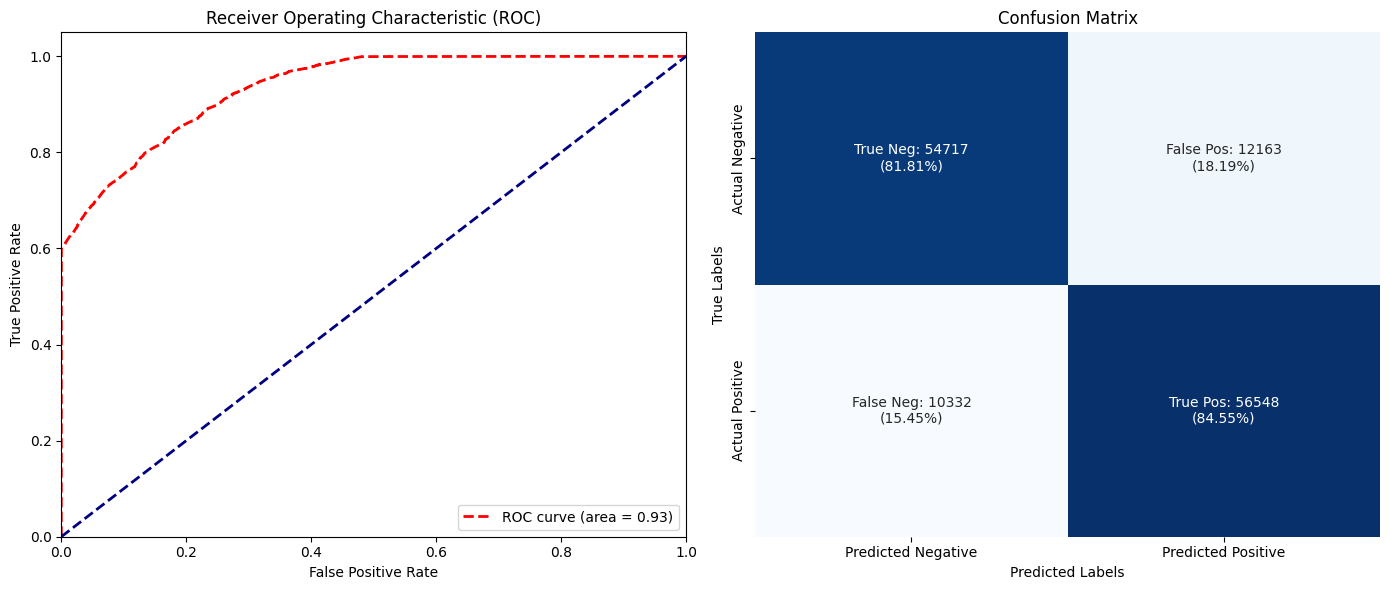

(None,                     Score
Accuracy Score   0.831826
Recall Score     0.845514
Precision Score  0.822983
F1 Score         0.834097
ROC AUC Score    0.934690)


In [76]:
#Evaluation Metrix
print(Evaluation_Metrics(L, X_val, Y_val))

#### **1. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in Logistic Reggression**

1. **Regularization Parameter (C)**: This parameter controls the strength of regularization. If the value of C is very low, it means strong regularization. If the value of C is high, it means weak regularization.

2. **Penalty**:  Determines the type of regularization to apply: Lasso regression (L1), Ridge regression (L2), or Elastic Net (a combination of L1 and L2).



In [83]:

# Define the parameter grid
param_grid = {
    'C': [ 0.1, 0.2, 0.3, 20,40],
    'penalty': ['l1', 'l2', 'elasticnet']
}
print(Hyperparameter_tuning(L,X_val,Y_val,param_grid,'HalvingRandomSearchCV'))
print(Hyperparameter_tuning(L,X_val,Y_val,param_grid,'RandomizedSearchCV'))


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 133760
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 15
n_resources: 12
Fitting 3 folds for each of 15 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 5
n_resources: 36
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 108
Fitting 3 folds for each of 2 candidates, totalling 6 fits

      Best parameters by HalvingRandomSearchCV: {'penalty': 'l2', 'C': 20},
      Best cross-validation score: 0.7849206349206349
      execution time : 2 sec
      
n_iter :30
Cv :5
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters by RandomizedSearchCV: {'penalty': 'l2', 'C': 40},
      Best cross-validation score: 0.8332685406698565
      execution time : 612 sec
      


In [73]:
#Train the model with the best paramters
#n_iter=30 and cv=5
La=LogisticRegression(
    penalty='l2',C=40
)
La.fit(X_train,Y_train)

LogisticRegression(C=40)

Evaluation Before Hyperparameter Tuning 


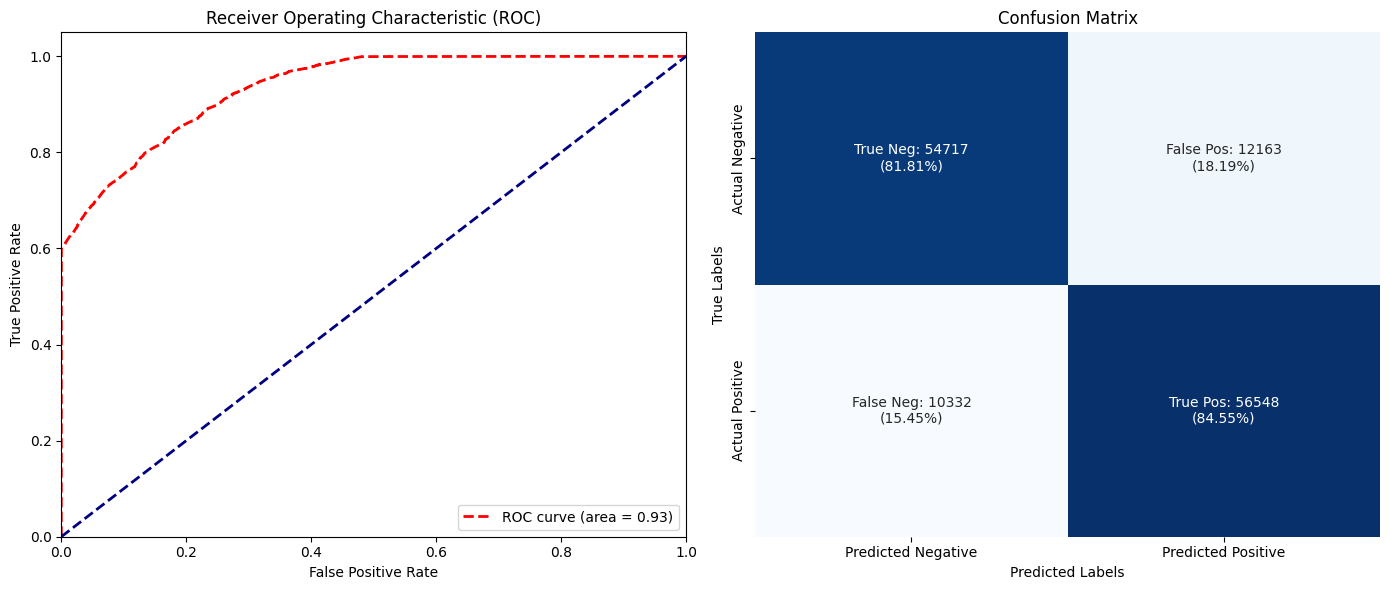

(None,                     Score
Accuracy Score   0.831826
Recall Score     0.845514
Precision Score  0.822983
F1 Score         0.834097
ROC AUC Score    0.934690)
Evaluation after Hyperparameter Tuning 


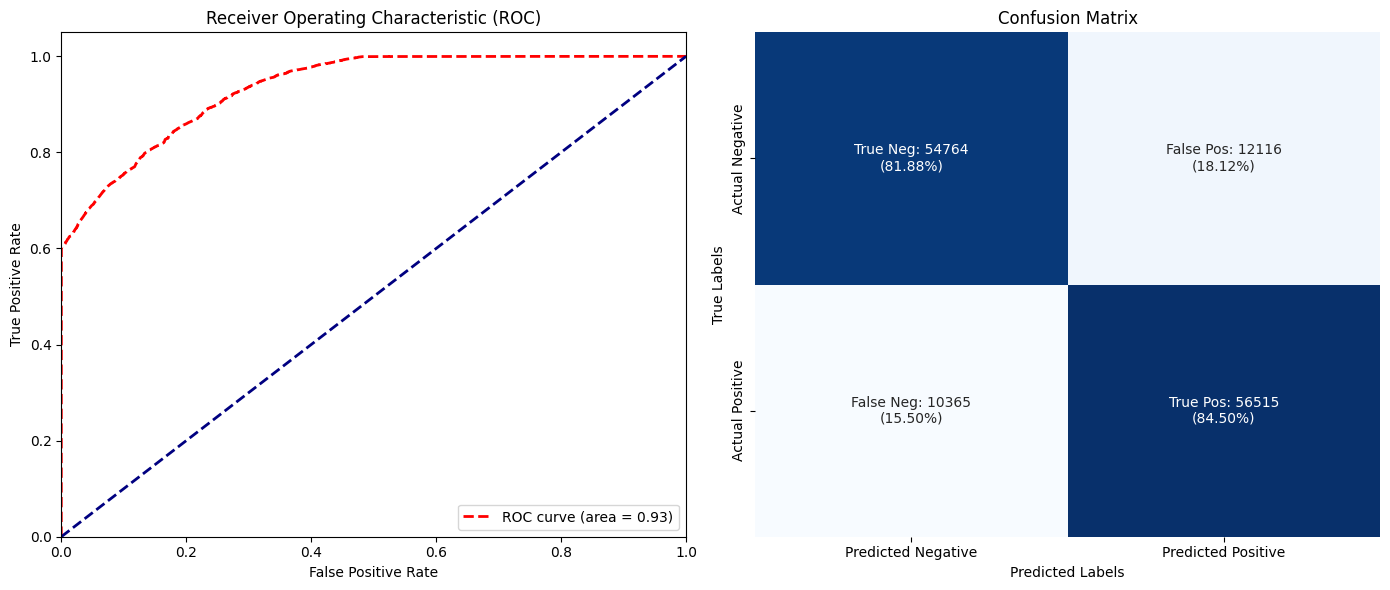

(None,                     Score
Accuracy Score   0.831930
Recall Score     0.845021
Precision Score  0.823462
F1 Score         0.834102
ROC AUC Score    0.934699)
Evaluating the model's performance on an unseen dataset.


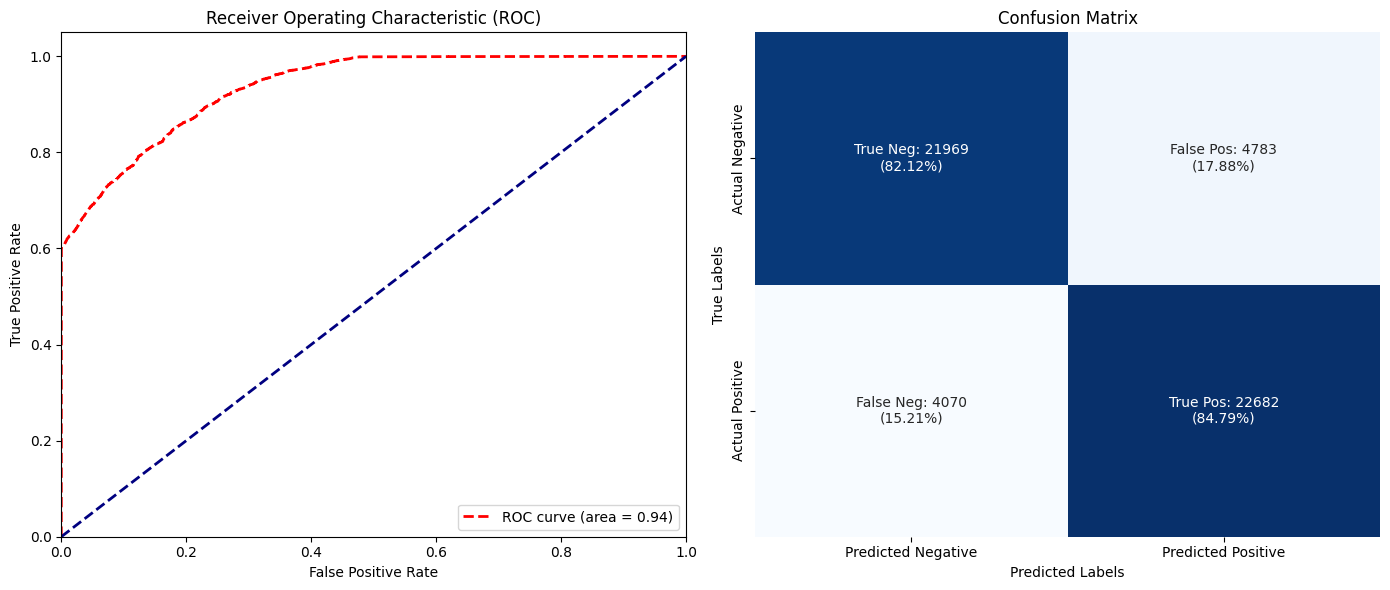

(None,                     Score
Accuracy Score   0.834536
Recall Score     0.847862
Precision Score  0.825851
F1 Score         0.836712
ROC AUC Score    0.935933)


In [77]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(L,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(La,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(La,X_test,Y_test))

##### **Which hyperparameter optimization technique have you used and why?**

I have used RandomizedSearchCV and HalvingRandomSearchCV because they are more time-efficient compared to GridSearchCV. While GridSearchCV exhaustively searches through all possible combinations of the parameters, leading to long execution times, RandomizedSearchCV and HalvingRandomSearchCV use different strategies to reduce computation time.

RandomizedSearchCV evaluates a random subset of parameter combinations, quickly covering a broad search space. HalvingRandomSearchCV starts with many parameter combinations and iteratively narrows down the best-performing ones through successive "halving" steps.

##### **Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

There is a slight change in my accuracy score, which may be due to a slight increase in the number of true negative cases.

### **ML Model - 2 Decision Tree**


A Decision Tree is a supervised learning algorithm for classification and regression. It splits data into subsets based on feature values, forming a tree structure with decision nodes and leaf nodes representing outcomes. It uses measures like Gini impurity or variance reduction to choose splits. While easy to interpret, it can overfit without proper pruning.

In [78]:

#for model training
from sklearn.tree import DecisionTreeClassifier


In [79]:
D=DecisionTreeClassifier()
D.fit(X_train,Y_train)

DecisionTreeClassifier()

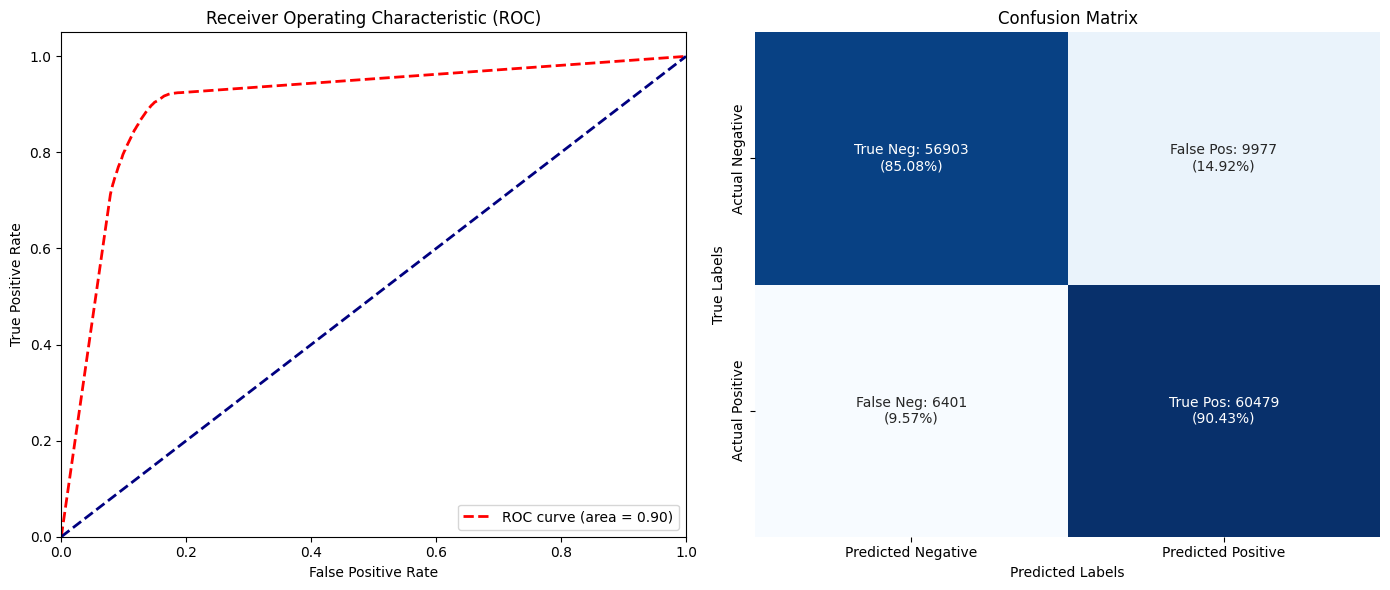

(None,                     Score
Accuracy Score   0.877557
Recall Score     0.904291
Precision Score  0.858394
F1 Score         0.880745
ROC AUC Score    0.903387)


In [80]:
#Evaluation metrics and Roc_curve
print(Evaluation_Metrics(D,X_val,Y_val))

#### **1. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in Dicision Tree**

1. **max_depth**:Maximum depth of the tree. Limits the number of levels to prevent overfitting

2. **min_samples_split**:Minimum number of samples required to split an internal node. Prevents splits that don't improve the model much.

3. **min_samples_leaf**: Minimum number of samples required at a leaf node. Ensures that leaves have enough samples to provide reliable predictions

4. **max_features**:Maximum number of features to consider when looking for the best split. Introduces randomness to help prevent overfitting.

5. **criterion**: Function to measure the quality of a split (e.g., Gini impurity, entropy for classification; MSE for regression).

6. **max_leaf_nodes**: Maximum number of leaf nodes. Limits the complexity of the model.

7. **min_impurity_decrease:** Minimum impurity decrease required to split a node. Ensures splits improve the model sufficiently


In [77]:
#using RandomizedSearchCV for hyperparamter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid

param_grid = {"splitter":["best","random"],
              'criterion':['gini', 'entropy', 'log_loss'],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,4,5,7,9,10],
           "min_samples_split":[1,4,7,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,2,3,30,40],
           'random_state':[23]}


# Define the estimator
d = DecisionTreeClassifier()
#model,X_train,Y_train,param_grid,tuning_model
# Initialize RandomizedSearchCV
print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))
print(Hyperparameter_tuning(d,X_train,Y_train,param_grid,'RandomizedSearchCV'))



n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 10
min_resources_: 12
max_resources_: 481534
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 13440
n_resources: 12
Fitting 3 folds for each of 13440 candidates, totalling 40320 fits
An error occurred: Could not pickle the task to send it to the workers.
n_iter :30
Cv :4
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best parameters by RandomizedSearchCV: {'splitter': 'best', 'random_state': 23, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'gini'},
      Best cross-validation score: 0.8788434434687651
      execution time : 73 sec
      


In [81]:
#Train the model with the best paramters
#n_iter=30, cv=4
Da=DecisionTreeClassifier(
  splitter= 'best', random_state= 23, min_samples_split= 7,
  min_samples_leaf= 4, max_leaf_nodes= None, max_features= None, max_depth= None, criterion= 'gini'
)
Da.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=7, random_state=23)

Evaluation Before Hyperparameter Tuning 


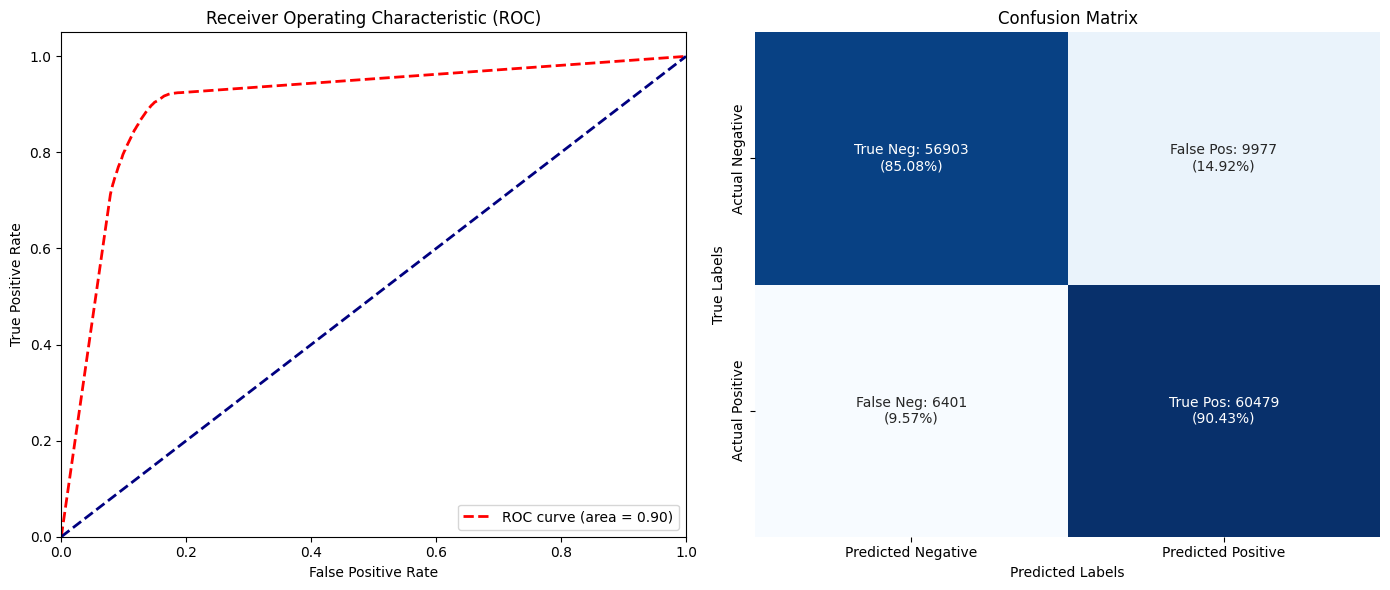

(None,                     Score
Accuracy Score   0.877557
Recall Score     0.904291
Precision Score  0.858394
F1 Score         0.880745
ROC AUC Score    0.903387)
Evaluation after Hyperparameter Tuning 


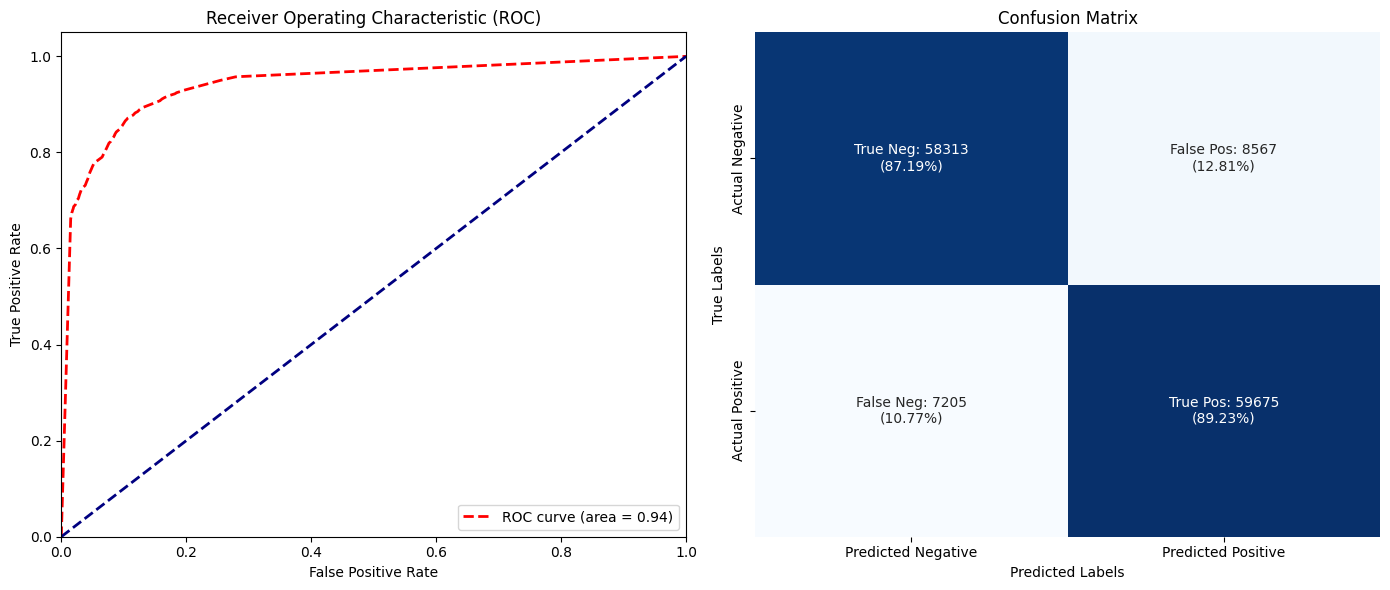

(None,                     Score
Accuracy Score   0.882087
Recall Score     0.892270
Precision Score  0.874461
F1 Score         0.883276
ROC AUC Score    0.941429)
Evaluating the model's performance on an unseen dataset.


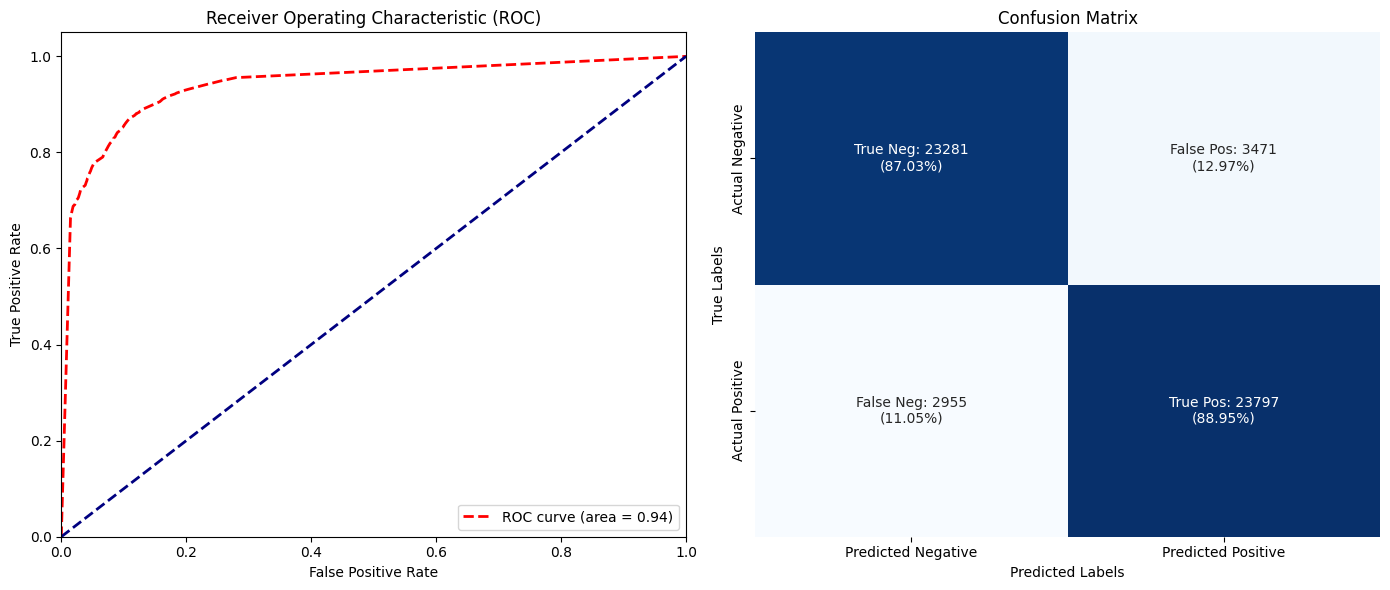

(None,                     Score
Accuracy Score   0.879897
Recall Score     0.889541
Precision Score  0.872708
F1 Score         0.881044
ROC AUC Score    0.940529)


In [82]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(D,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Da,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(Da,X_test,Y_test))


In [83]:
#testing
test=balanced_df[balanced_df['Response']==1].iloc[:,0:-1].sample(1000)
a=pd.Series(Da.predict(test))
a.value_counts()

1    913
0     87
Name: count, dtype: int64

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

here is a slight increase in accuracy, which might be due to an increase in the number of true negative cases (correctly identifying negative instances) and a reduction in false positive cases (incorrectly identifying positive instances). The ROC-AUC score (Receiver Operating Characteristic - Area Under the Curve) has increased to 0.95, indicating that the model has a significantly improved ability to distinguish between positive and negative classes.

### **ML Model - 3 RandomForestClassifier**

A Random Forest Classifier is an ensemble learning method that operates by constructing multiple decision trees during training. It is essentially a bagging classifier where the base estimator is a DecisionTreeClassifier, hence the term "forest" because it is a collection of trees.

In [84]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_jobs=-1)
R.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

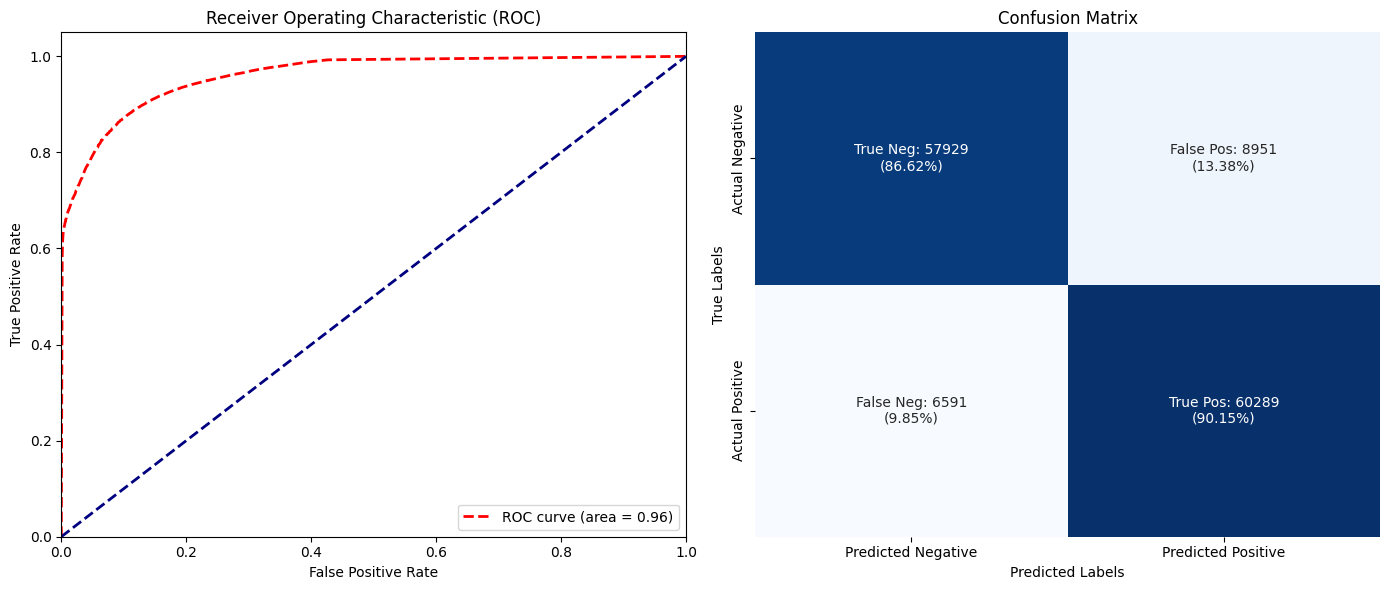

(None,                     Score
Accuracy Score   0.883807
Recall Score     0.901450
Precision Score  0.870725
F1 Score         0.885821
ROC AUC Score    0.959416)


In [85]:
#Evaluation Metrix
print(Evaluation_Metrics(R, X_val,Y_val))

#### **1. Cross- Validation & Hyperparameter Tuning**

**Hyperparameters in RandomForestClassifier**

1. **n_estimators**: Number of trees in the forest.

2. **max_features**: Maximum number of features each tree is allowed to consider for splitting a node.

3. **max_depth**: Maximum depth of each tree.

4. **min_samples_split**: Minimum number of samples required to split an internal node.

5. **min_samples_leaf**: Minimum number of samples required at a leaf node.

6. **bootstrap**: Whether bootstrap samples are used when building trees.

7. **criterion**: Function to measure the quality of a split (e.g., Gini impurity, entropy).

In [83]:

param_grid = {
    'n_estimators': [None,150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4],
    'max_features': [ 'sqrt', 'log2'],

}
#print(Hyperparameter_tuning(R,X_train,Y_train,param_grid,'HalvingRandomSearchCV'))


In [84]:
print(Hyperparameter_tuning(R,X_train,Y_train,param_grid,'RandomizedSearchCV'))


n_iter :10
Cv :3
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters by RandomizedSearchCV: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None},
      Best cross-validation score: 0.8864337706502482
      execution time : 696 sec
      


In [86]:
#Train my model with best parameters

Ra=RandomForestClassifier(
    n_estimators=150,min_samples_split=6,min_weight_fraction_leaf=0.0,min_samples_leaf=1,max_features='sqrt',max_depth=None
)

Ra.fit(X_train,Y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=150)

Evaluation Before Hyperparameter Tuning 


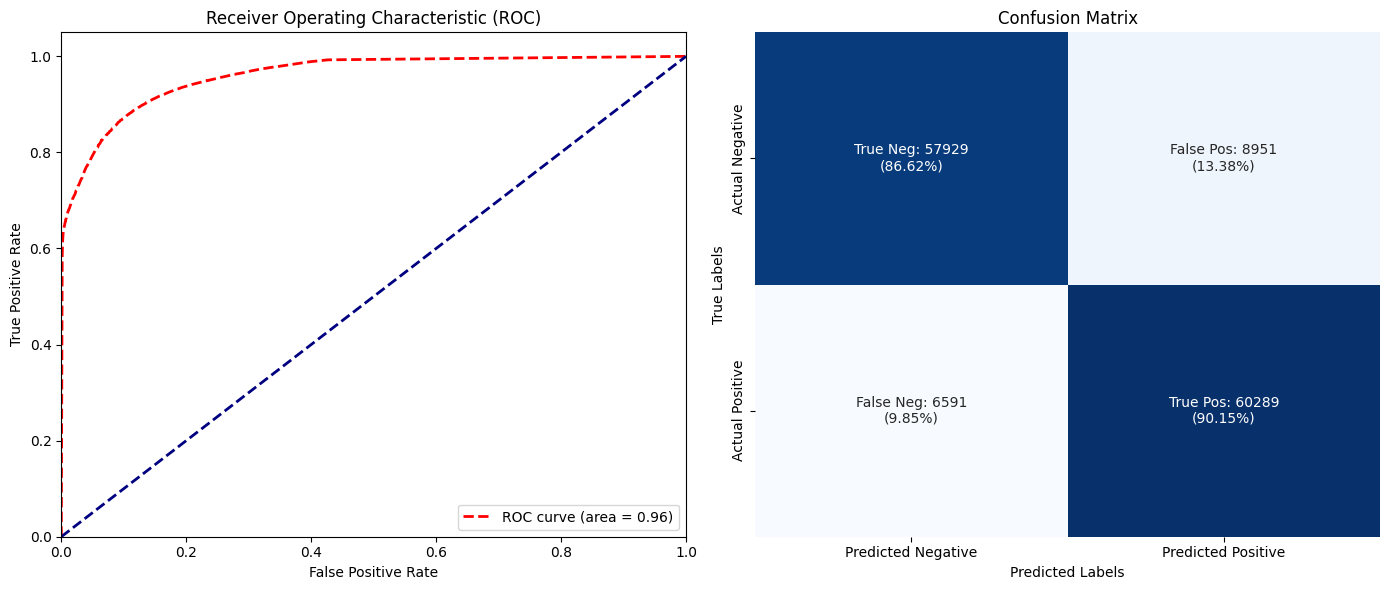

(None,                     Score
Accuracy Score   0.883807
Recall Score     0.901450
Precision Score  0.870725
F1 Score         0.885821
ROC AUC Score    0.959416)
Evaluation after Hyperparameter Tuning 


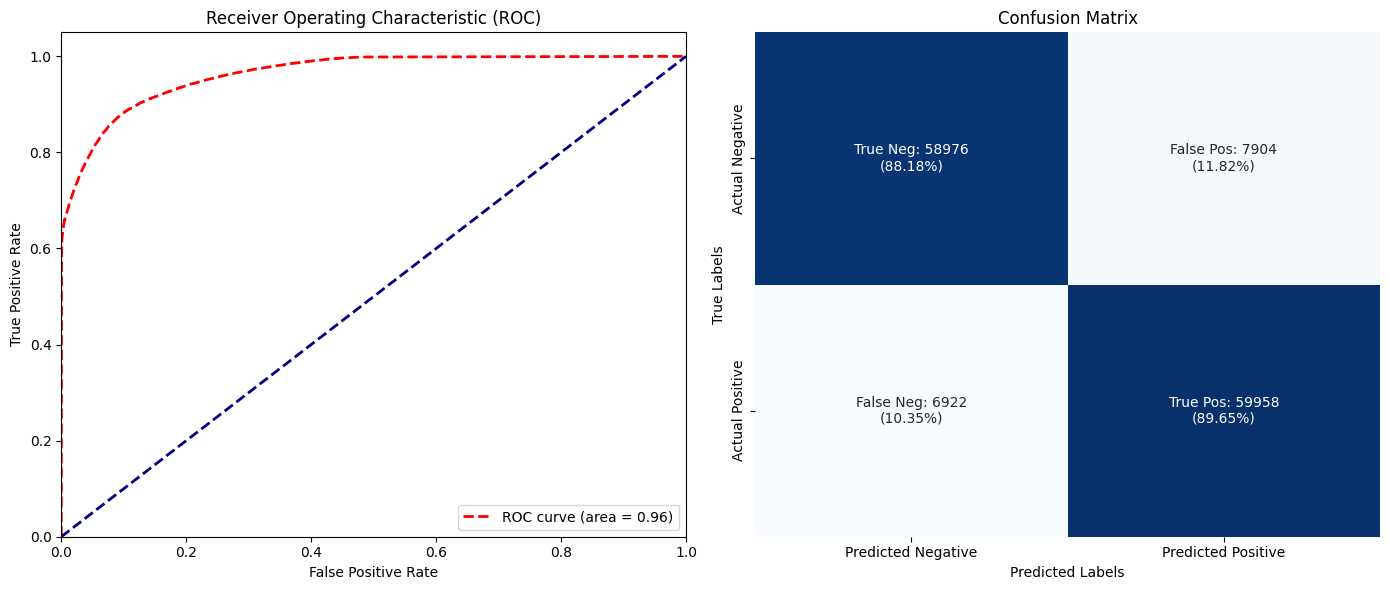

(None,                     Score
Accuracy Score   0.889160
Recall Score     0.896501
Precision Score  0.883528
F1 Score         0.889967
ROC AUC Score    0.963332)
Evaluating the model's performance on an unseen dataset.


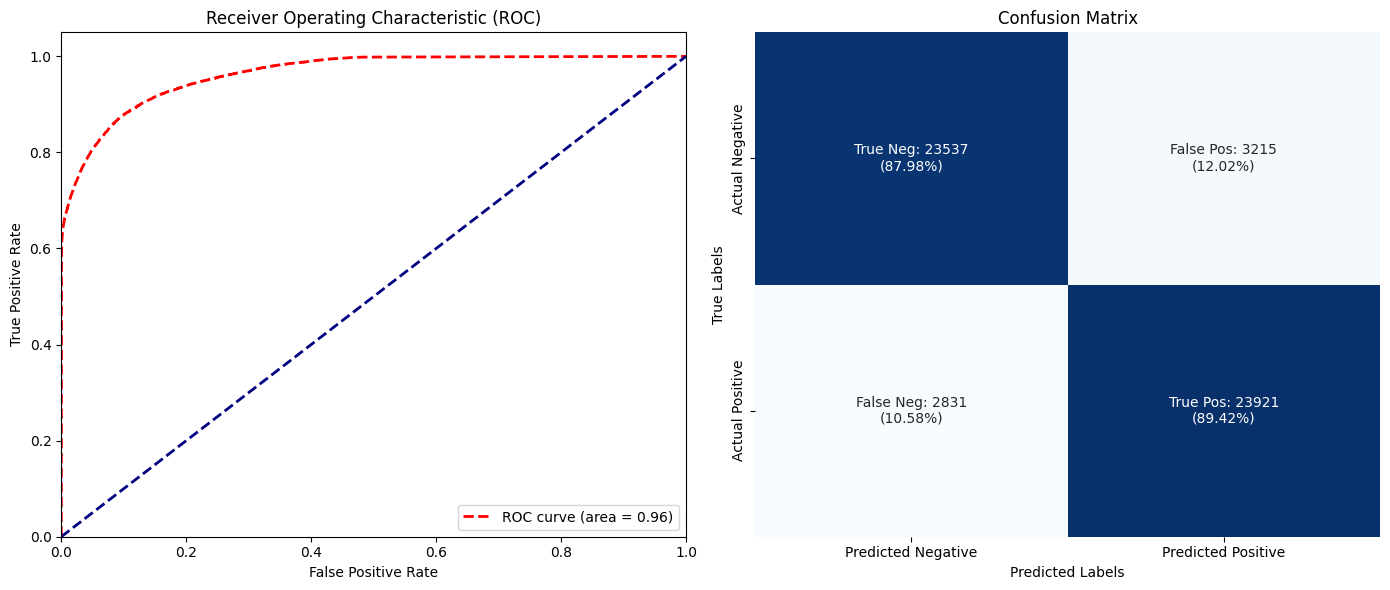

(None,                     Score
Accuracy Score   0.886999
Recall Score     0.894176
Precision Score  0.881523
F1 Score         0.887804
ROC AUC Score    0.963123)


In [87]:
#Evaluation Metrix
#Evaluation metrics and Roc_curve

print("Evaluation Before Hyperparameter Tuning ")
print(Evaluation_Metrics(R,X_val,Y_val))

print("Evaluation after Hyperparameter Tuning ")
print(Evaluation_Metrics(Ra,X_val,Y_val))

print("Evaluating the model's performance on an unseen dataset.")
print(Evaluation_Metrics(Ra,X_test,Y_test))


In [88]:
#testing
test=balanced_df[balanced_df['Response']==1].iloc[:,0:-1].sample(1000)
a=pd.Series(R.predict(test))
a.value_counts()

1    965
0     35
Name: count, dtype: int64

In [89]:
#testing
test=balanced_df[balanced_df['Response']==0].iloc[:,0:-1].sample(1000)
a=pd.Series(R.predict(test))
a.value_counts()

0    908
1     92
Name: count, dtype: int64

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

here is a slight increase in accuracy, which might be due to an increase in the number of true negative cases (correctly identifying negative instances) and a reduction in false positive cases (incorrectly identifying positive instances).

### **2. Which ML model did you choose from the above created models as your final prediction model and why?**

Based on the results from all the models we trained and evaluated, we can conclude that the Random Forest Classifier is the best model for our dataset. The optimal parameters for this model are {'n_estimators': 150}. Here are its performance metrics:

Accuracy Score: ~0.89

Precision: 0.88

Recall: 0.89

F1 Score: 0.88

ROC-AUC Score: 0.96

Elapsed Time: 789 seconds

This model demonstrates high accuracy, a high ROC-AUC score, high precision, and high recall compared to other models, making it the best choice for our data.

### **3. Explain the model which you have used and the feature importance using any model explainability tool?**

In [90]:
feat_imp=pd.DataFrame()
feat_imp['columns']=balanced_df.columns[0:balanced_df.columns.get_loc('Response')]
feat_imp['feature_importance']=pd.Series(Ra.feature_importances_)

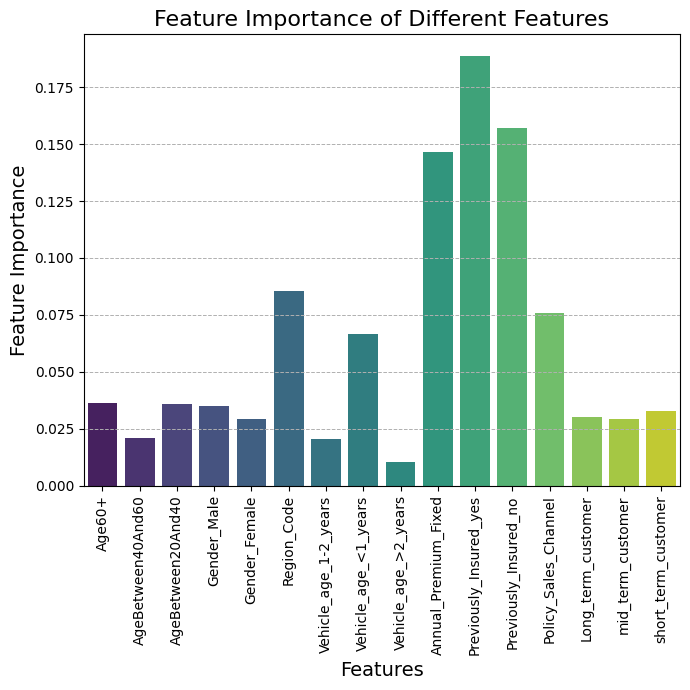

In [91]:

# Assuming feat_imp is your DataFrame containing feature importance
plt.figure(figsize=(7,7))  # Adjust the figure size for better readability
sns.barplot(data=feat_imp, x='columns', y='feature_importance', palette='viridis')  # Use a color palette for better visuals

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Feature Importance', fontsize=14)
plt.title('Feature Importance of Different Features', fontsize=16)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


## ***8.*** ***Future Work (Optional)***

### **1. Save the best performing ml model in a pickle file or joblib file format for deployment process.**




In [92]:
import joblib

In [93]:
#the best perfoming model for me was RandomForestClassifier
joblib_filename = 'RandomForestModel.joblib'

data_to_save={
    'model':Ra,
    'functions': {
        'Evaluation Metrics':Evaluation_Metrics,
        'Visualisation':visualise
    }
}

joblib.dump(data_to_save,joblib_filename)
print(f"Model saved to {joblib_filename}")


Model saved to RandomForestModel.joblib


### **2. Again Load the saved model file and try to predict unseen data for a sanity check.**


In [94]:
loaded_data = joblib.load('RandomForestModel.joblib')

# Extract the model, plot data, and functions
loaded_model = loaded_data['model']
loaded_functions = loaded_data['functions']

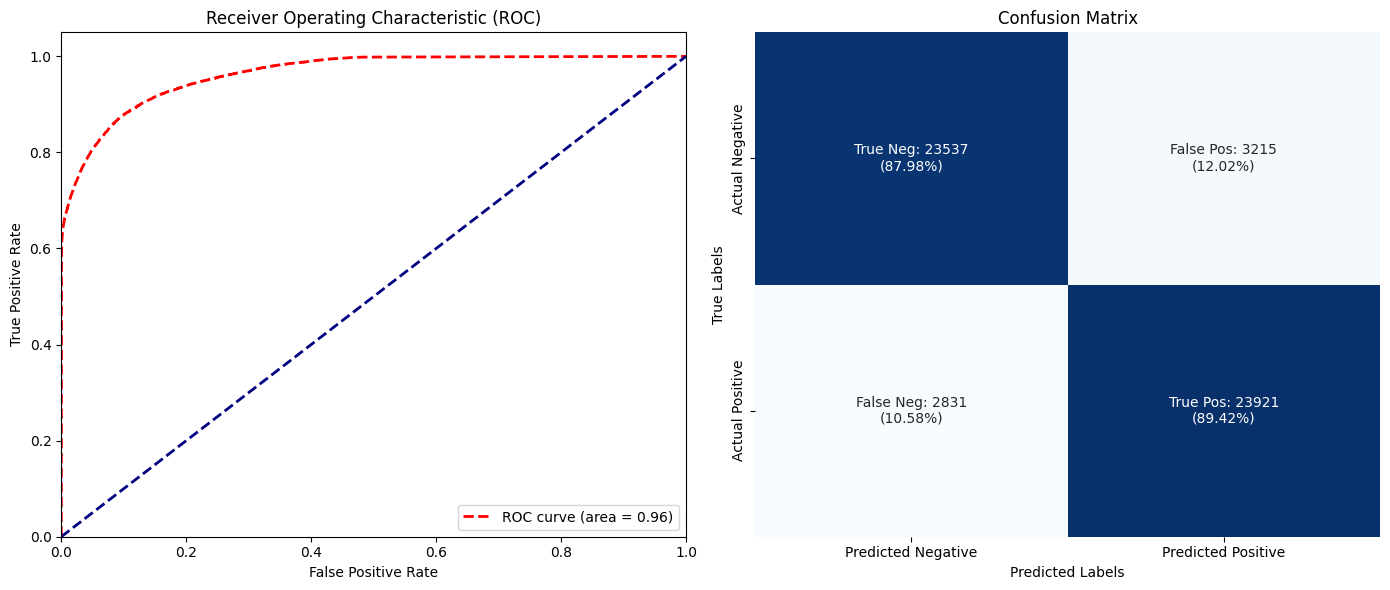

(None,                     Score
Accuracy Score   0.886999
Recall Score     0.894176
Precision Score  0.881523
F1 Score         0.887804
ROC AUC Score    0.963123)


In [95]:
#test
y_pred=loaded_model.predict(X_test)
print(loaded_functions['Evaluation Metrics'](loaded_model,X_test,Y_test))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Initially, we checked our dataset for null values and duplicates. Since there were no null values or duplicates, no further treatment was required. We then performed feature engineering to create new features. Before data processing, we applied feature scaling techniques to normalize the data, ensuring that all features were on the same scale, making it easier for machine learning algorithms to process.

Through Exploratory Data Analysis (EDA), we categorized age into three groups: '20-40', '40-60', and '60+'. We also categorized the vintage into 'Short term', 'Mid term', and 'Long term'. To handle the imbalanced dataset, we used the SMOTE (Synthetic Minority Over-sampling Technique).

Our analysis revealed that younger customers (aged 20-40) are more interested in vehicle insurance. Additionally, customers with vehicles older than two years and those with damaged vehicles are more likely to be interested in vehicle insurance.

For feature selection, we used Lasso regression and sequential forward selection. We found that the feature 'Previously policy insured' was the most important, while 'Driving license' was the least important.

We then applied various machine learning algorithms to predict whether a customer would be interested in vehicle insurance. For logistic regression, we achieved an accuracy score of 83% after hyperparameter tuning. Using decision tree classifier and random forest classifier, we achieved accuracy scores of approximately 88% and 89%, respectively, after hyperparameter tuning.

Based on these results, we selected the random forest classifier as our best model, with an accuracy score of 89%.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***